# <font color = "cyan" size=7>**Analysis of Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/first inten project.csv")

In [ ]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
df.shape

(36285, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
# Before
df.isna().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
# Before
df.duplicated().sum()

0

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['date of reservation'] = pd.to_datetime(df["date of reservation"], errors = "coerce")

In [ ]:
df[df.index == 2626]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,Online,1,1,0,61.43,0,NaT,Canceled


In [ ]:
df[df['date of reservation'].isna()].index

Index([ 2626,  3677,  5600,  6343,  7648,  8000,  8989,  9153,  9245,  9664,
        9934, 10593, 10652, 10747, 11881, 13958, 14304, 15363, 15438, 17202,
       18380, 18534, 18680, 19013, 20419, 21674, 21688, 26108, 27559, 27928,
       30552, 30616, 30632, 30839, 32041, 34638, 35481],
      dtype='int64')

In [ ]:
print("Number of null after = ", df["date of reservation"].isna().sum())
df['date of reservation'].fillna("3/1/2018", inplace=True)

Number of null after =  37


<ipython-input-12-c85814bb2f9e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date of reservation'].fillna("3/1/2018", inplace=True)


In [ ]:
df["year"] = df['date of reservation'].dt.year
df["month"] = df['date of reservation'].dt.month
df["day"] = df['date of reservation'].dt.day

<ipython-input-14-79e270cc2caa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_adult, y = y_adult, palette= "muted")


Text(0.5, 1.0, 'Number of adult visitors')

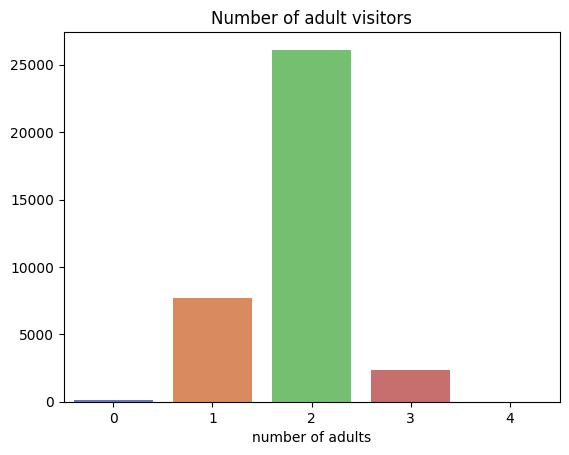

In [ ]:
x_adult = df["number of adults"].value_counts().index
y_adult = df["number of adults"].value_counts().values
sns.barplot(x = x_adult, y = y_adult, palette= "muted")
plt.title("Number of adult visitors")

<ipython-input-15-a55d0403ea4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_child, y = y_child, palette= "muted")


Text(0.5, 1.0, 'Number of children visitors')

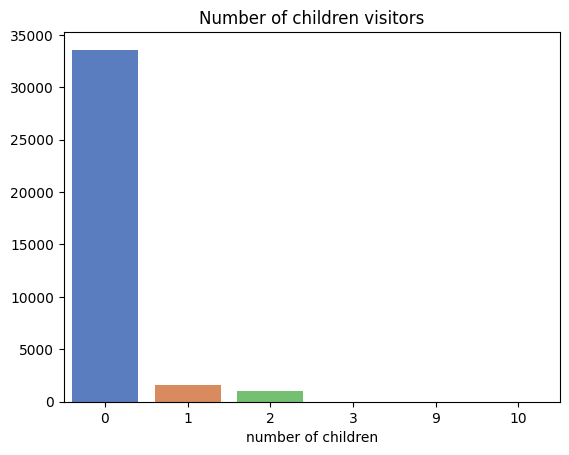

In [ ]:
x_child = df["number of children"].value_counts().index
y_child = df["number of children"].value_counts().values
sns.barplot(x = x_child, y = y_child, palette= "muted")
plt.title("Number of children visitors")

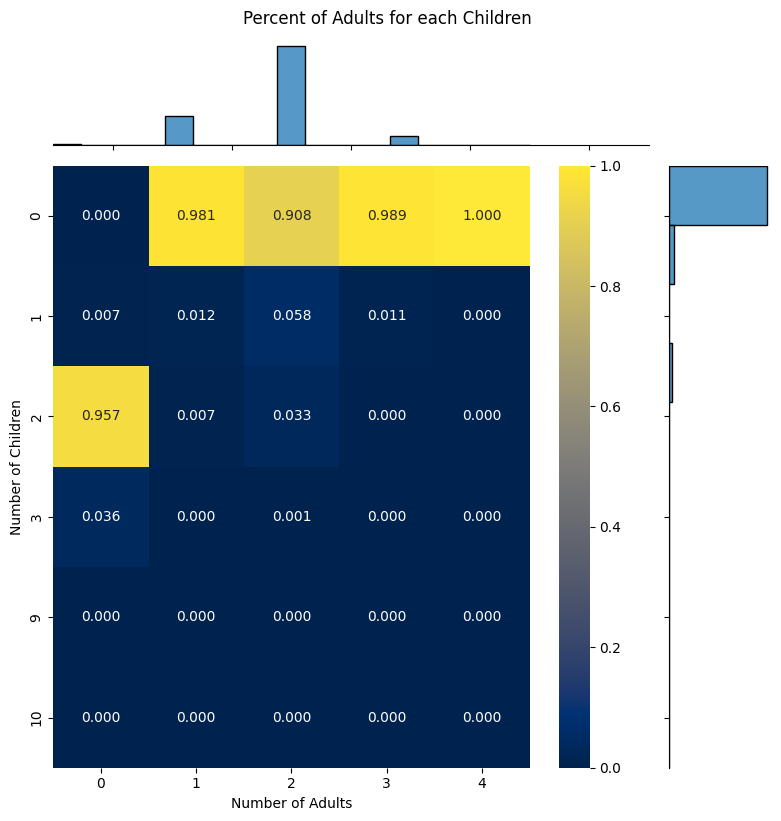

In [ ]:
# @title <font color = "cyan" size = 6>Percent of Adults for each Children
# Create the cross-tabulation
crosstab = pd.crosstab(df["number of children"], df["number of adults"], normalize="columns")

# Create a jointplot
joinPlot = sns.jointplot(x="number of adults", y="number of children", data=df, kind="hex", height= 8)

# Plot the heatmap on the joint axis
sns.heatmap(crosstab, annot=True, cmap="cividis", fmt=".3f", cbar=True, ax=joinPlot.ax_joint)


# Set labels and title
joinPlot.ax_joint.set_xlabel('Number of Adults')
joinPlot.ax_joint.set_ylabel('Number of Children')
joinPlot.fig.suptitle('Percent of Adults for each Children', y=1.02)

plt.show()


<font color = "cyan" size =5>1.  Most of Adult Visitors comes without children

---

<font color = "yellow" size =5> 2.Most visitors of children came without Adult with count of 2

---

<font color = "cyan" size =5> 3.Number of visitor children without adult is either one, two, or three and the most was two

---


<font color = "cyan" size =5> 5.As so small percentage some values shows zero

---

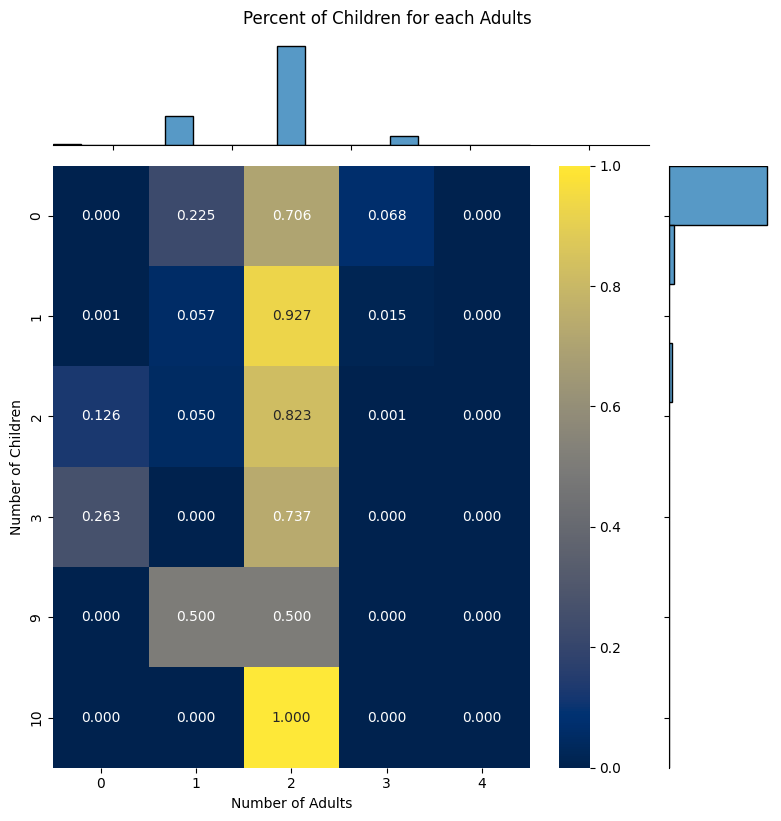

In [ ]:
# @title <font color = "cyan" size = 6>Percent of Children for each Adults

# Create the cross-tabulation
crosstab = pd.crosstab(df["number of children"], df["number of adults"], normalize="index")

# Create a jointplot
joinPlot = sns.jointplot(x="number of adults", y="number of children", data=df, kind="hex", cmap="YlGnBu", height= 8)

# Plot the heatmap on the joint axis
sns.heatmap(crosstab, annot=True, cmap="cividis", fmt=".3f", cbar=True, ax=joinPlot.ax_joint)


# Set labels and title
joinPlot.ax_joint.set_xlabel('Number of Adults')
joinPlot.ax_joint.set_ylabel('Number of Children')
joinPlot.fig.suptitle('Percent of Children for each Adults', y=1.02)

plt.show()


<font color = "yellow" size =5> 1.Most visitors of children came with two adult






In [ ]:
favour_weekend_percent = ((df["number of weekend nights"] != 0) & (df["number of week nights"] == 0)).mean()
print("Percent of bookers who prefer weekend = ",favour_weekend_percent )
favour_weekdays_percent = ((df["number of week nights"] != 0) & (df["number of weekend nights"] == 0)).mean()
print("Percent of bookers who prefer week days = ",favour_weekdays_percent )
favour_both_percent = ((df["number of week nights"] != 0) & (df["number of weekend nights"] != 0)).mean()
print("Percent of bookers who prefer both = ",favour_both_percent )
no_stay_percent = 1-(favour_weekend_percent + favour_weekdays_percent + favour_both_percent)
print("Percent of bookers who don't prefer stay = ", no_stay_percent )

Percent of bookers who prefer weekend =  0.06363511092738046
Percent of bookers who prefer week days =  0.46294612098663357
Percent of bookers who prefer both =  0.4712691194708557
Percent of bookers who don't prefer stay =  0.0021496486151302285


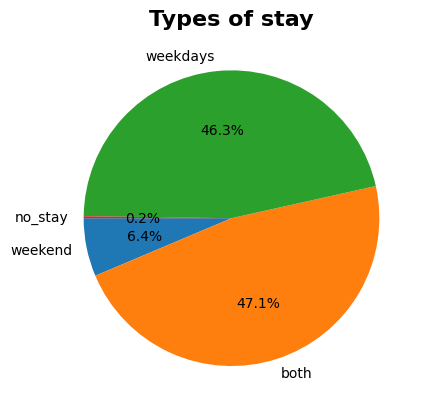

In [ ]:
x = [favour_weekend_percent, favour_both_percent, favour_weekdays_percent, no_stay_percent]
labels = ["weekend", "both", "weekdays", "no_stay"]
plt.pie(x= x, labels = labels, autopct='%1.1f%%', startangle=180 )
plt.title('Types of stay', fontsize=16, weight='bold')
plt.show()

In [ ]:
def percent_canceled(row):
    prev_canceled = row['P-C']
    prev_not_canceled = row['P-not-C']
    total_booking = prev_canceled + prev_not_canceled

    if total_booking > 0:
        # shows old customer (repeated)
        percent_canceled = prev_canceled / total_booking
    else:
        # shows new customer (not repeated)
        percent_canceled = -1

    return percent_canceled



In [ ]:
# Create new features
df["total_stay_night"] = df["number of week nights"] + df["number of weekend nights"]
df["total_visiors"] = df["number of adults"] + df["number of children"]
df["percent_canceled"] = df.apply(percent_canceled, axis=1)
# Drop unnecessary features
df.drop(columns= ["Booking_ID", "date of reservation"], inplace = True)

<Axes: xlabel='total_stay_night', ylabel='average price'>

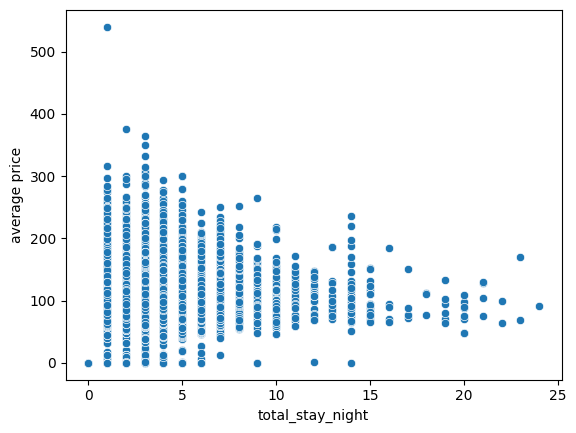

In [ ]:
sns.scatterplot(data = df, x = "total_stay_night", y = "average price")

<font color="yellow" size=5>1. There are short stays with high costs, and long stays with low costs.</font>

---

<font color="yellow" size=5>2. Zero stay nights correspond to zero cost.</font>

---

Text(0.5, 1.0, 'Market Segment')

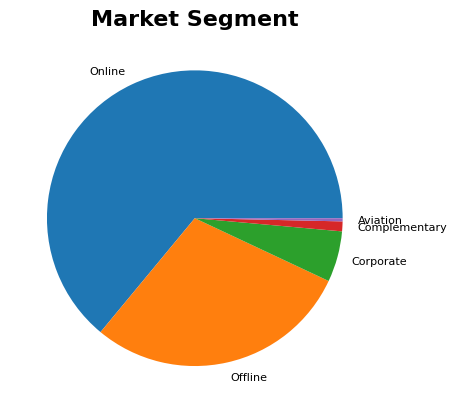

In [ ]:
seg_percent = df["market segment type"].value_counts(normalize = True).values
seg_name = df["market segment type"].value_counts().index
plt.pie(data = df, x = seg_percent, labels = seg_name , textprops={'fontsize': 8})
plt.title('Market Segment', fontsize=16, weight='bold')

<font color ="yellow" size = 5> 1. Online : booked by its website or in any online method

<font color ="yellow" size = 5> 2. Offline : booked by its traditional travel agencies

<font color ="yellow" size = 5> 3. Corporate : booked by companies for thier employees

In [ ]:
# Number of free offers of different segs
pd.crosstab(df[df["average price"] ==0]["market segment type"], df[df["average price"] ==0]["year"])

year,2017,2018
market segment type,,
Complementary,130,224
Online,103,88


In [ ]:
pd.crosstab(df["market segment type"], df["year"])

year,2015,2016,2017,2018
market segment type,,,,
Aviation,0,0,0,125
Complementary,0,0,139,252
Corporate,0,0,498,1519
Offline,1,1,2926,7603
Online,0,0,2953,20268


In [ ]:
print("percent of free offeres of complementary in 2017 = ", round(130/139, 2))
print("percent of free offeres of complementary in 2018 = ", round(224/252, 2))
print("percent of free offeres of Online in 2017 = ", round(103/2953, 2))
print("percent of free offeres of Online in 2018 = ", round(88/20268, 3))

percent of free offeres of complementary in 2017 =  0.94
percent of free offeres of complementary in 2018 =  0.89
percent of free offeres of Online in 2017 =  0.03
percent of free offeres of Online in 2018 =  0.004



<font color="yellow" size = 5> Full free offers given for two segments : least reserved complementary and and highest reserved online

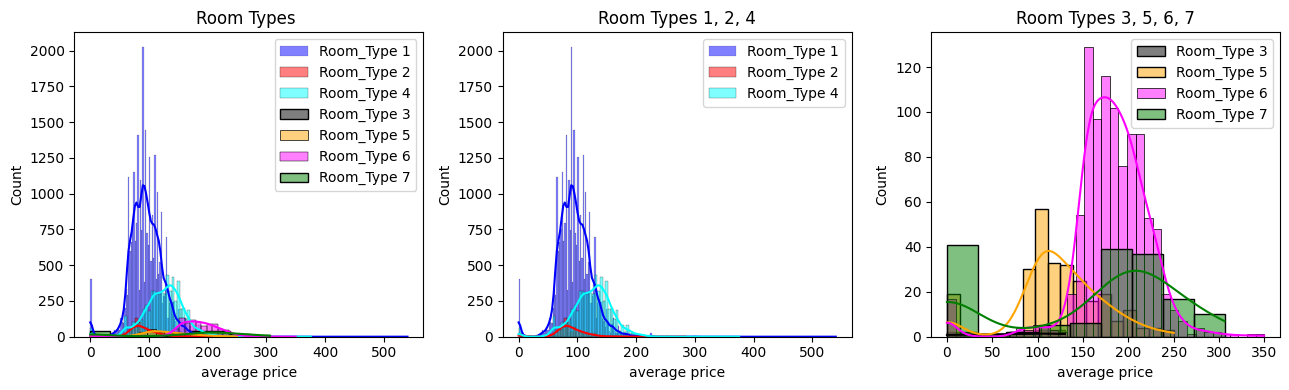

In [ ]:
# Grouping the data by room type
grouped = df.groupby("room type")["average price"]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))

# First plot
for room_type, color in zip(["Room_Type 1", "Room_Type 2", "Room_Type 4", "Room_Type 3", "Room_Type 5", "Room_Type 6", "Room_Type 7"], ["blue", "red", "cyan", "black", "orange", "fuchsia", "green"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[0])

axes[0].set_title("Room Types ")
axes[0].legend()

# Second subplot: Room_Type 1, 2, 4
for room_type, color in zip(["Room_Type 1", "Room_Type 2", "Room_Type 4"], ["blue", "red", "cyan"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[1])

axes[1].set_title("Room Types 1, 2, 4")
axes[1].legend()

# Third subplot: Room_Type 3, 5, 6, 7
for room_type, color in zip(["Room_Type 3", "Room_Type 5", "Room_Type 6", "Room_Type 7"], ["black", "orange", "fuchsia", "green"]):
    sns.histplot(x=grouped.get_group(room_type), kde=True, label=room_type, color=color, ax=axes[2])

axes[2].set_title("Room Types 3, 5, 6, 7")
axes[2].legend()



# Show plot
plt.tight_layout()
plt.show()


<font color="yellow" size="5">1. Most needed rooms are type1, type4, and type6 in order.</font><br>
<font color="yellow" size="5">2. Most free offers are with type1, type4, and type7 in order.</font><br>
<font color="yellow" size="5">3. The demand for type3 is very low.</font><br>
<font color="yellow" size="5">4. As shown, the average price of type1 is the least, followed by type2, type3, and so on. This suggests that rooms can be ordered based on price.</font>


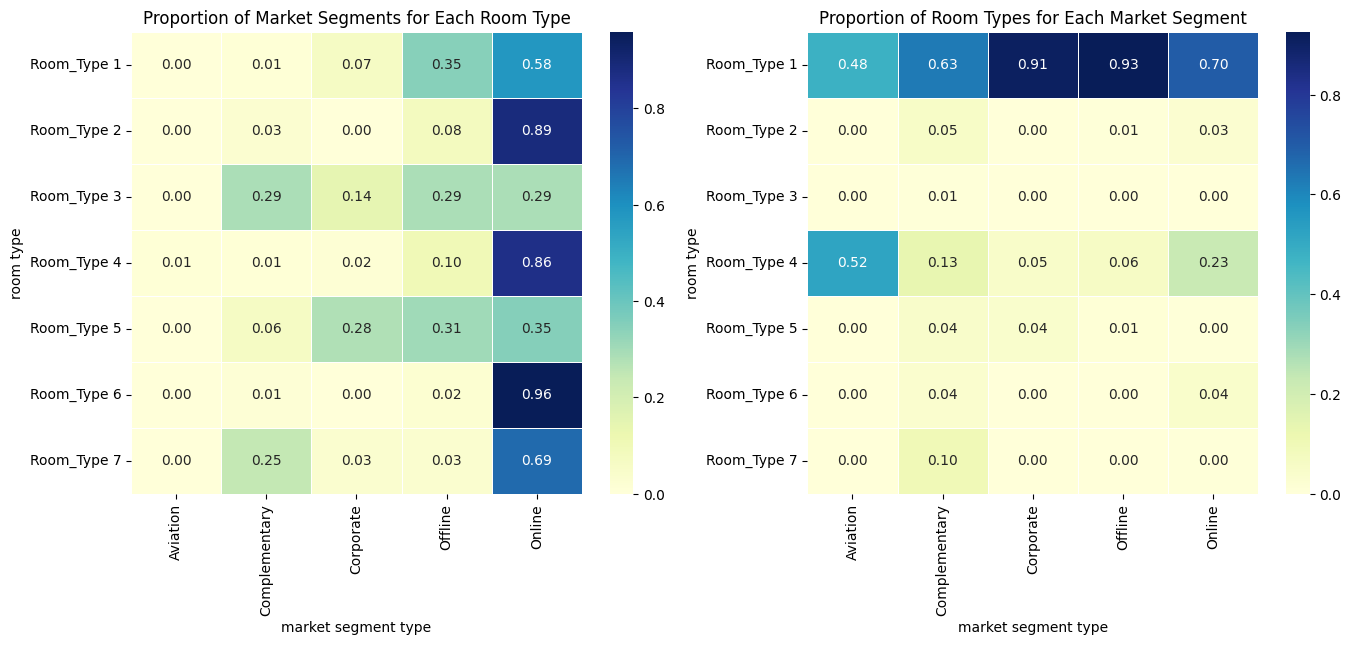

<Figure size 1000x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
crosstabPerRoom = pd.crosstab(df["room type"], df["market segment type"], normalize="index")
crosstabPerSeg = pd.crosstab(df["room type"], df["market segment type"], normalize="columns")

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstabPerRoom, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, ax = axes[0])
sns.heatmap(crosstabPerSeg, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, ax = axes[1])

# Show the plot
axes[0].set_title('Proportion of Market Segments for Each Room Type')
axes[1].set_title('Proportion of Room Types for Each Market Segment')

plt.show()
plt.tight_layout()

<font color="yellow" size =5> 1 . Online segment prefers all types of room on the top type1 then type4

<font color="yellow" size =5> 2 . High demand of type1 room by all segs

<font color="yellow" size =5> 3 . Room7 booked mostly by online then complementary

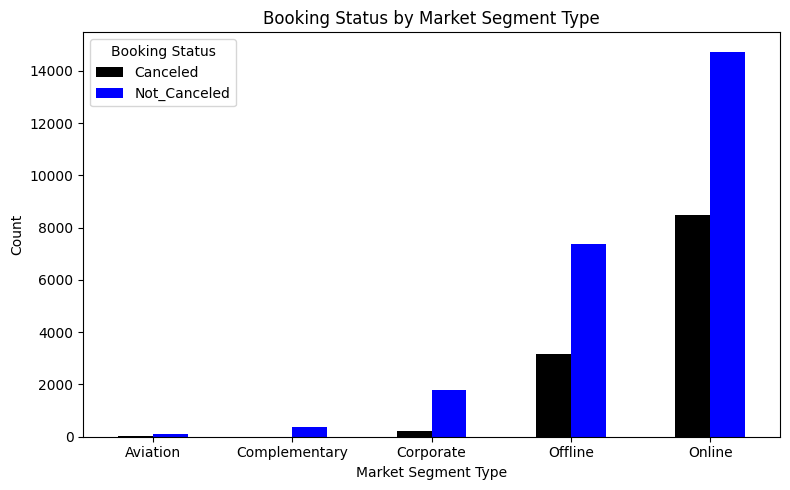

In [ ]:
# Group by and calculate the size
grouped = df.groupby(["market segment type", "booking status"]).size().unstack(fill_value=0)

# Plot the grouped bar chart
grouped.plot(kind="bar", figsize=(8, 5), color = ["black", "blue"])

# Add labels and title
plt.title("Booking Status by Market Segment Type")
plt.xlabel("Market Segment Type")
plt.ylabel("Count")
plt.legend(title="Booking Status")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

<font color = "yellow" size = 5>1. No cancellations were observed in the complementary segment, possibly because 94% of it are free

<font color = "yellow" size = 5> 2. The cancellation rate for online and offline bookings is nearly 50%

In [ ]:
#df.groupby(["room type", "total_visiors"]).size()

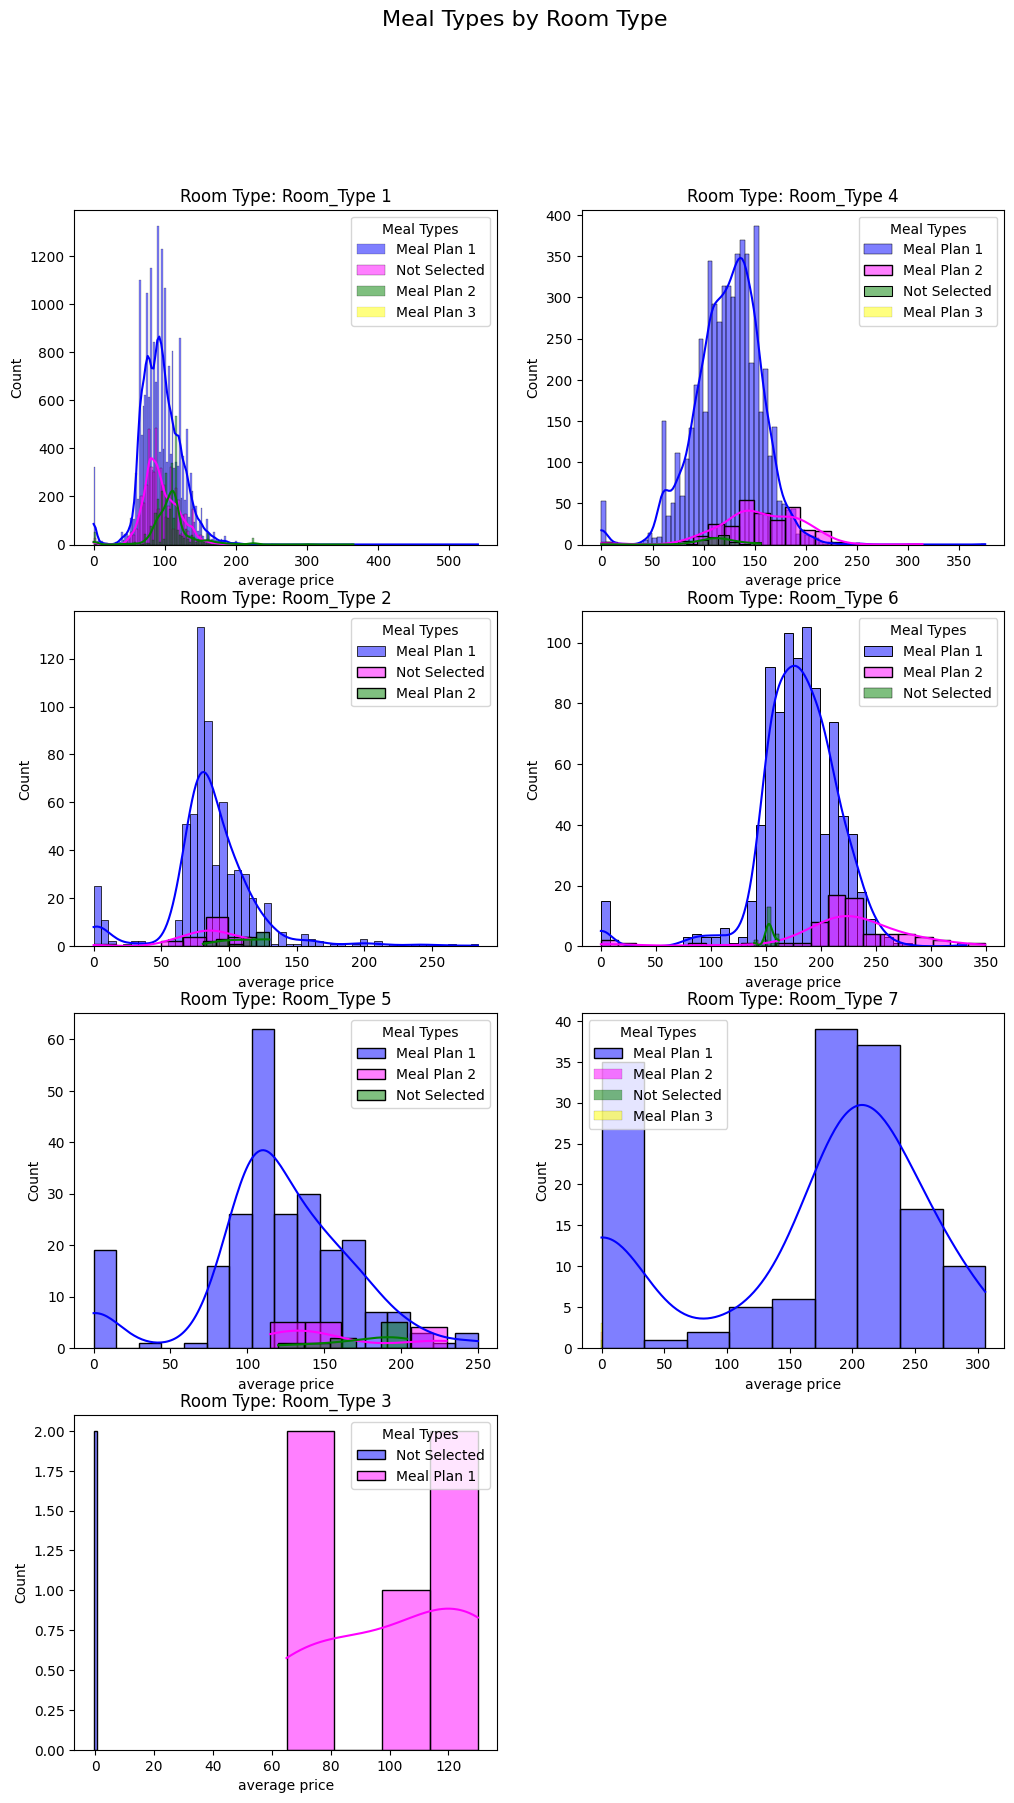

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
colors = ["blue", "fuchsia", "green", "yellow"]
rooms = df["room type"].unique()
for indx,room in enumerate(rooms):
  meals = df[df["room type"] == room]["type of meal"].unique()
  for meal_type, color in zip(meals, colors[:len(meals)]):
    grouped = df[df["room type"] == room].groupby("type of meal")["average price"]
    sns.histplot(x=grouped.get_group(meal_type), kde=True, label=meal_type, color=color, ax=axes[indx//2, indx%2])

      # Add subplot title and legend
    axes[indx//2, indx%2].set_title(f"Room Type: {room}")
    axes[indx//2, indx%2].legend(title="Meal Types")

# Add overall title and layout adjustments
fig.suptitle("Meal Types by Room Type", fontsize=16)

fig.delaxes(axes[3, 1])  # Remove the last subplot (3rd row, 2nd column)

plt.show()


<font color="yellow" size =5> 1 . In all types of room, the Meal Plan 1 preffered the most at all visitors.

<font color="yellow" size =5> 2 . There is no demand for Meal Plan 3 when booking room types 2, 5, and 6, and very little demand for it in other room types

<font color="yellow" size =5> 3 . Most of free offers got with Meal Plan 1

<font color="yellow" size =5> 4 . In General, average price of Meal plan2 is higher than non-selected plane



<Axes: xlabel='repeated', ylabel='percent_canceled'>

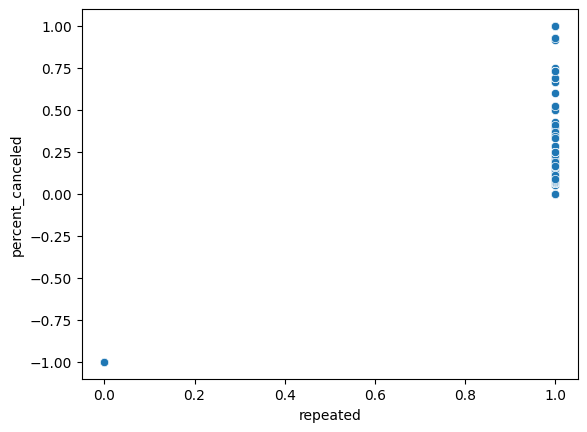

In [ ]:
sns.scatterplot(data = df, x = 'repeated', y = 'percent_canceled')

<font color="yellow" size=5> non-repeated visitor is new so percent of cancelation is unknown

<Axes: xlabel='special requests', ylabel='average price'>

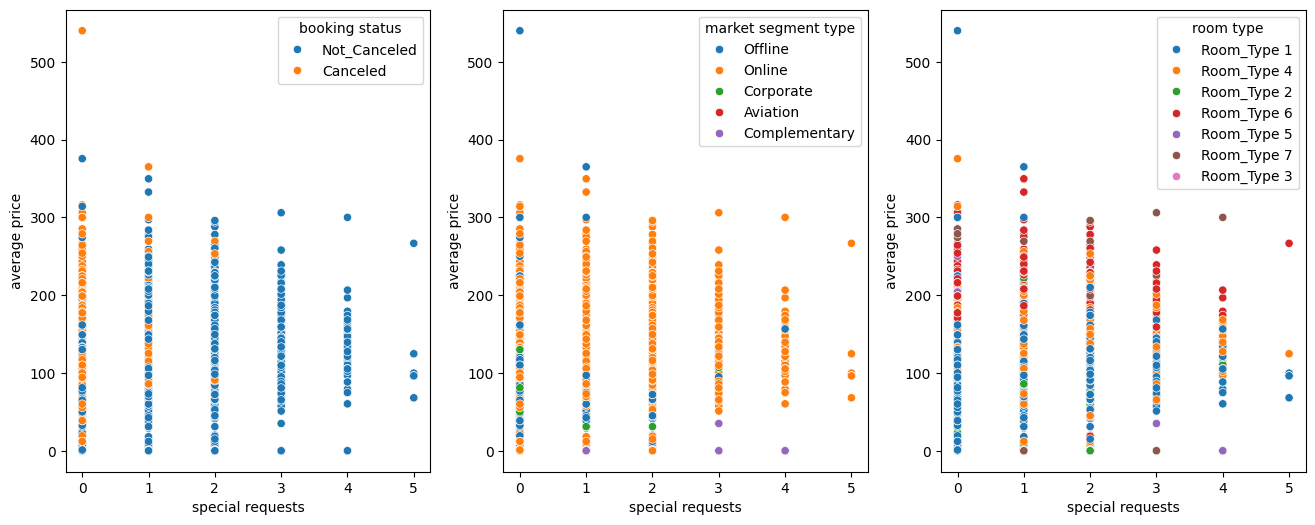

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue="booking status", ax = axes[0])
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue='market segment type', ax = axes[1])
sns.scatterplot(data = df, x = 'special requests', y = "average price", hue='room type', ax = axes[2])

<font color="yellow" size =5> 1 . low request of high special requests with lower cancelation

<font color="yellow" size =5> 2 . Some prices are low despite high special requests, and vice versa

In [ ]:
df[df["market segment type"] == "Online"]["special requests"].value_counts()

,count
special requests,
0,9253
1,9155
2,4113
3,629
4,64
5,7


In [ ]:
canceled = df[df["booking status"] == "Canceled"]
non_canceled = df[df["booking status"] == "Not_Canceled"]

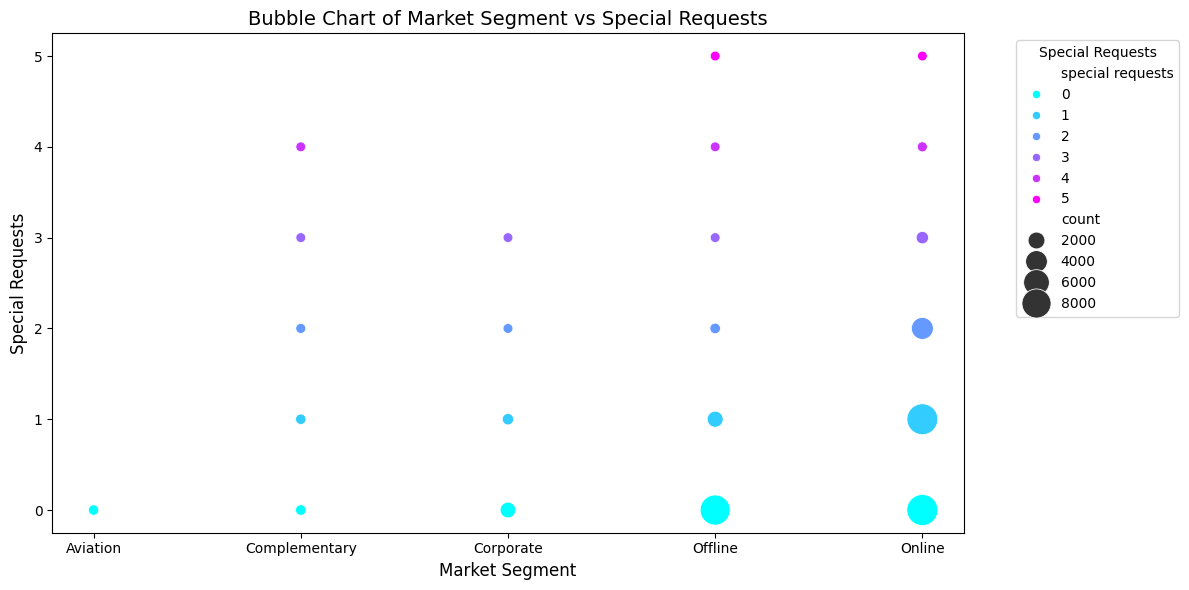

In [ ]:
# Aggregate data for bubble chart
bubble_data = df.groupby(['market segment type', 'special requests']).size().reset_index(name="count")

# Plot bubble chart
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='market segment type',
    y='special requests',
    size="count",
    hue='special requests',
    data=bubble_data,
    sizes=(50, 500),
    palette="cool"
)

# Customize
plt.title("Bubble Chart of Market Segment vs Special Requests", fontsize=14)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Special Requests", fontsize=12)
plt.legend(title="Special Requests", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


<font color="yellow" size =5> 1 . Aviation segment has no special requests

<font color="yellow" size =5> 2 . Both online and Offline prefer all types of request but 0, 1 are the most

<font color="yellow" size =5> 3 . Low demand on 5th special requests

<Axes: xlabel='booking status', ylabel='Count'>

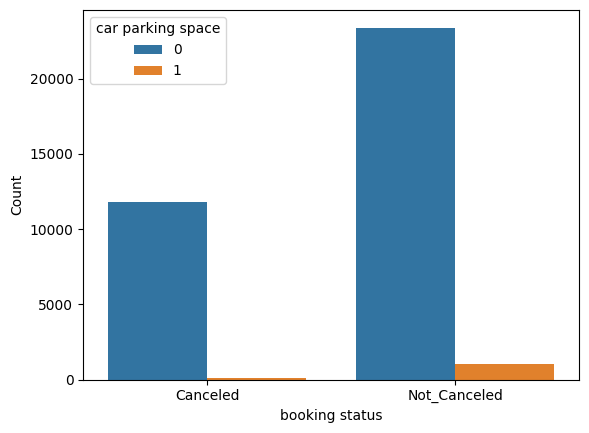

In [ ]:
car_space = df.groupby(["booking status", 'car parking space']).size().reset_index(name="Count")
sns.barplot(data = car_space, x = "booking status", y = "Count", hue = 'car parking space')

<font color="yellow" size =5> Low demand on car space service

In [ ]:
df[df['car parking space'] == 1]["year"].value_counts()

,count
year,
2018,960
2017,164


<font color="yellow" size = 5>  Hotel starts adding car parking space service

<font color="yellow" size = 5>  Less required of visitors




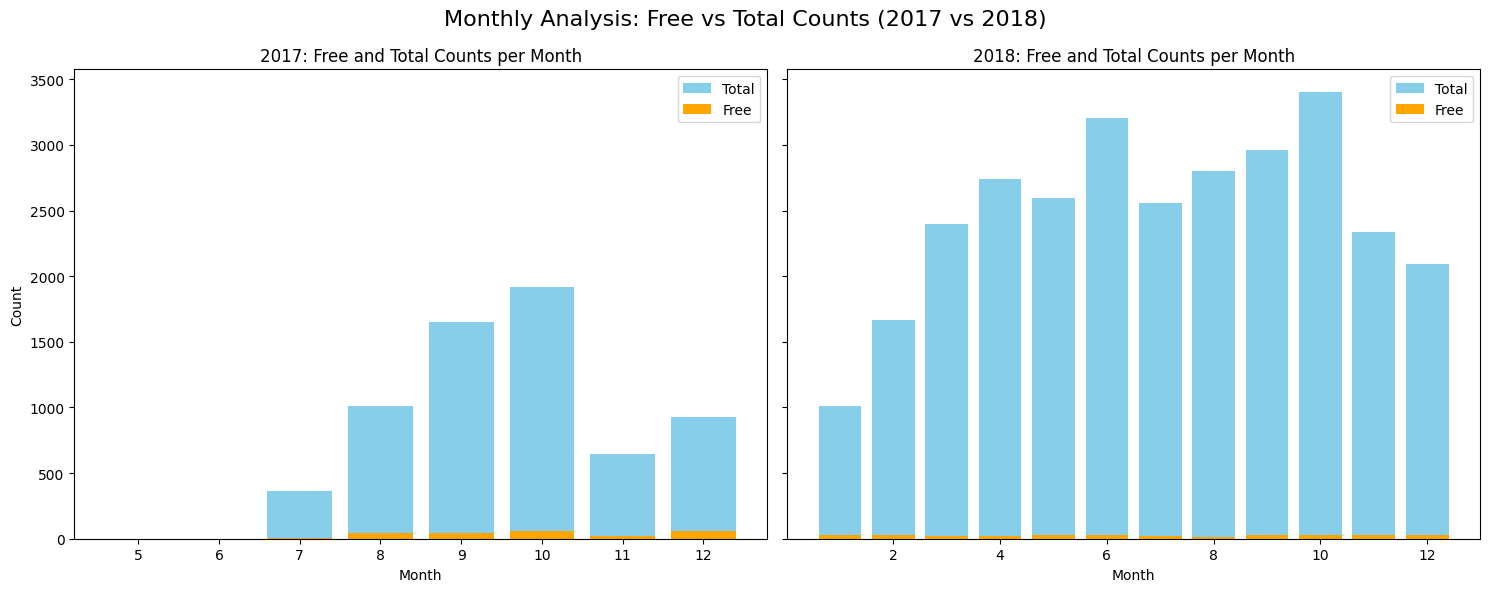

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 2017 and 2018
df_2017 = df[df["year"] == 2017]
df_2018 = df[df["year"] == 2018]

# Calculate data for 2017
total_2017 = df_2017["month"].value_counts().sort_index()  # Total counts for each month
free_2017 = df_2017[df_2017["average price"] == 0]["month"].value_counts().reindex(total_2017.index, fill_value=0)  # Free counts

# Calculate data for 2018
total_2018 = df_2018["month"].value_counts().sort_index()  # Total counts for each month
free_2018 = df_2018[df_2018["average price"] == 0]["month"].value_counts().reindex(total_2018.index, fill_value=0)  # Free counts

# Create subplots for 2017 and 2018
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Stacked bar chart for 2017
axes[0].bar(total_2017.index, total_2017, label="Total", color="skyblue")
axes[0].bar(total_2017.index, free_2017, label="Free", color="orange")
axes[0].set_title("2017: Free and Total Counts per Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Count")
axes[0].legend()

# Stacked bar chart for 2018
axes[1].bar(total_2018.index, total_2018, label="Total", color="skyblue")
axes[1].bar(total_2018.index, free_2018, label="Free", color="orange")
axes[1].set_title("2018: Free and Total Counts per Month")
axes[1].set_xlabel("Month")
axes[1].legend()

# Overall adjustments
fig.suptitle("Monthly Analysis: Free vs Total Counts (2017 vs 2018)", fontsize=16)
plt.tight_layout()
plt.show()


<font size= 5 color ="yellow" > 1 . Number of reservation in 2018 is higher than 2017.

<font size= 5 color ="yellow" > 2 . In 2018, the number of reservation is high throughout the year except in the end and beginning of year

<font size= 5 color ="yellow" > 3 . In 2017, the number of reservation is high at 9 and 10

<font size= 5 color ="yellow" > 4 . In 2018, the number of offers is equally throughout the year

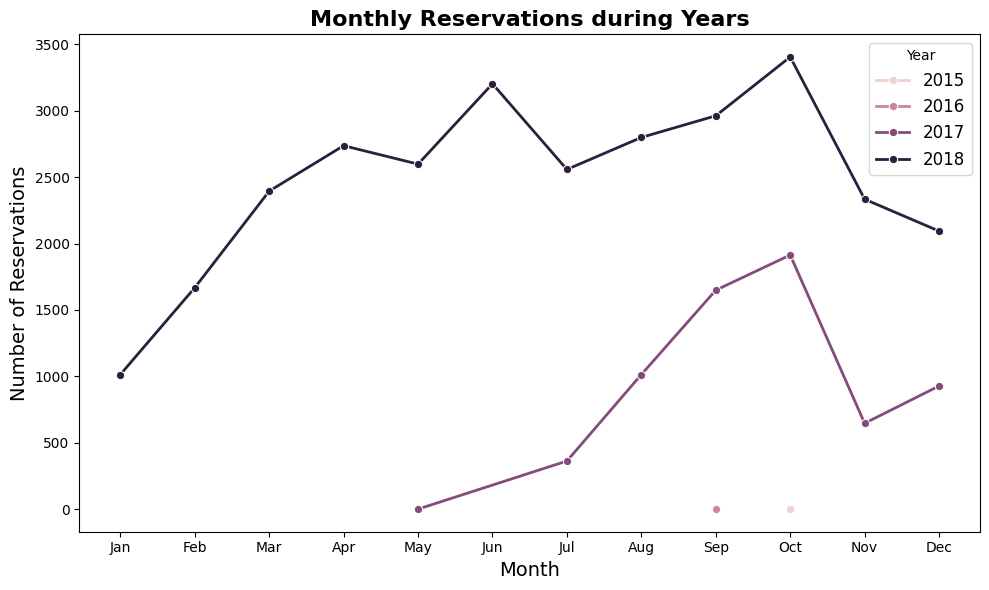

In [ ]:
monthly_data = df.groupby(['year', 'month']).size().reset_index(name='reservation_count')

# Plotting the line chart
plt.figure(figsize=(10, 6))

sns.lineplot(data=monthly_data, x='month', y='reservation_count', hue='year', marker='o', linewidth=2)

# Customize the plot
plt.title('Monthly Reservations during Years', fontsize=16, weight='bold', )
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reservations', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> 1.General Increasing in number of Reservation in 2018 compared with previous years

<font color="yellow" size = 5> 2.Decreasing reservation at the begining and end of year

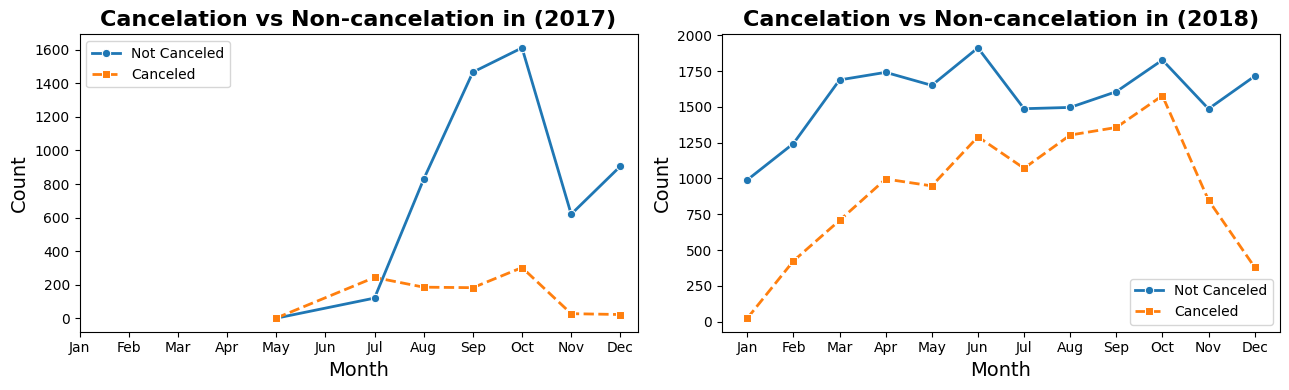

In [ ]:
# @title <font color = "cyan" size = 5>**Cancelation vs Not-Cancelation During 2017 & 2018**
# Prepare monthly data for plotting
monthly_data = df.groupby([ 'year','month', 'booking status']).size().unstack(fill_value=0).reset_index()

# Renaming columns for clarity
monthly_data.columns = [ 'year','month', 'Canceled', 'Not_Canceled']

# Set the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

def plot_monthly_data(year, ax, plot_title):
  # Plot for uncanceled reservations
  sns.lineplot(
      data=monthly_data[monthly_data["year"] == year],
      x='month',
      y='Not_Canceled',
      marker='o',
      linewidth=2,
      ax = axes[ax],
      label = "Not Canceled"

  )

  # Plot for canceled reservations
  sns.lineplot(
      data=monthly_data[monthly_data["year"] == year],
      x='month',
      y='Canceled',
      linestyle='--',
      marker='s',
      linewidth=2,
      ax = axes[ax],
      label = "Canceled"
  )
  # Customize the plot
  axes[ax].set_title(plot_title, fontsize=16, weight='bold')
  axes[ax].set_xlabel('Month', fontsize=14)
  axes[ax].set_ylabel('Count', fontsize=14)
  axes[ax].set_xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])



plot_monthly_data(2017, 0, 'Cancelation vs Non-cancelation in (2017)')
plot_monthly_data(2018, 1, 'Cancelation vs Non-cancelation in (2018)')



# Improve layout and show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> 1.Number of cancelation (may-July) exceeds Number of non-cancelation

<font color="yellow" size = 5> 2.In the end of both years, non-cancelation excels cancelation in high value

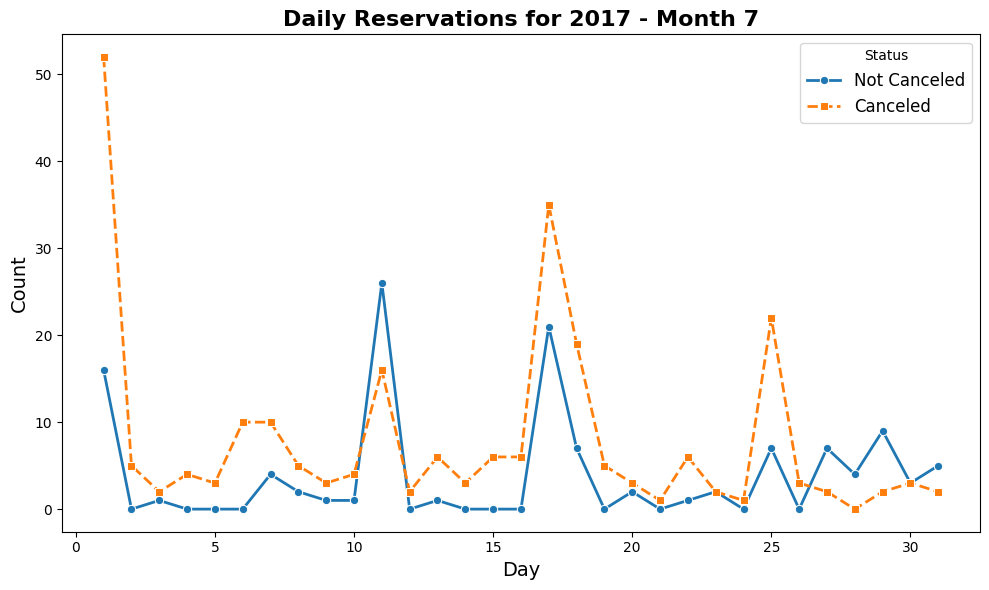

<function __main__.plot_dialy_data(month, year)>

In [ ]:
# @title <font color = "cyan" size = 5>**Cancelation vs Not-Cancelation  Based on your Option**

from ipywidgets import interact, widgets

# Sample data preparation
dialy_data = df.groupby(["month", "year", "day", "booking status"]).size().unstack(fill_value=0).reset_index()

# Renaming columns for clarity
dialy_data.columns = ["month", "year", "day", "Canceled", "Not_Canceled"]

# Function to plot dynamically
def plot_dialy_data(month, year):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Filter data based on selected month and year
    filtered_data = dialy_data[(dialy_data["month"] == month) & (dialy_data["year"] == year)]

    # Plot for uncanceled reservations
    sns.lineplot(
        data=filtered_data,
        x='day',
        y='Not_Canceled',
        marker='o',
        linewidth=2,
        label="Not Canceled",
        ax=ax
    )

    # Plot for canceled reservations
    sns.lineplot(
        data=filtered_data,
        x='day',
        y='Canceled',
        linestyle='--',
        marker='s',
        linewidth=2,
        label="Canceled",
        ax=ax
    )

    # Customize the plot
    ax.set_title(f"Daily Reservations for {year} - Month {month}", fontsize=16, weight='bold')
    ax.set_xlabel('Day', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.legend(title="Status", fontsize=12)

    plt.tight_layout()
    plt.show()

# Dropdown widgets for filtering
month_widget = widgets.Dropdown(
    options=range(1, 13),
    value=7,
    description='Month:',
    style={'description_width': 'initial'}
)

year_widget = widgets.Dropdown(
    options=dialy_data["year"].unique(),
    value=2017,
    description='Year:',
    style={'description_width': 'initial'}
)

# Interactive plot
interact(plot_dialy_data, month=month_widget, year=year_widget)


<font color="yellow" size = 5> 1. When we drill down, I found that most of reservation canceled in July, 2017 so we notice at the previous figure excedding of Cancelation

<font color="yellow" size = 5> 2. In August, 2017, Number of cancelation become increasing especially at day = 15

<font color="yellow" size = 5> 2. In end of 2017, Number of non-cancelation is so low during month

In [ ]:
df[(df["year"] == 2018) &(df["month"] == 12)]['booking status'].value_counts()

,count
booking status,
Not_Canceled,1714
Canceled,380


Text(0, 0.5, 'Number of Free Offers')

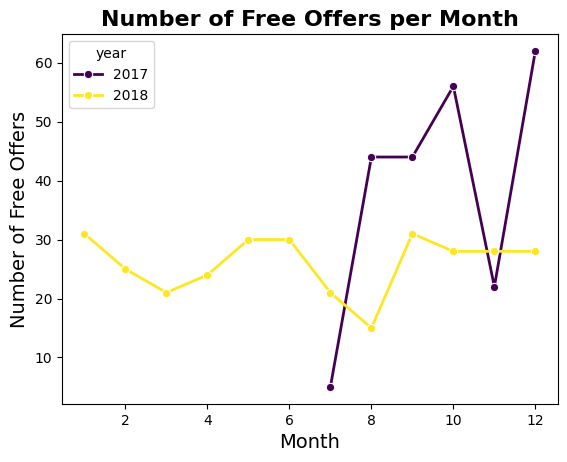

In [ ]:
freeOfferPerMonth = df[df["average price"] == 0].groupby(["year", "month"]).size().reset_index(name = "Free Offer Count")
sns.lineplot(data=freeOfferPerMonth, x='month', y='Free Offer Count', hue='year', marker='o', linewidth=2, palette= "viridis")
plt.title('Number of Free Offers per Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Free Offers', fontsize=14)


<font color="yellow" size = 5> In general, number of free offers given for visiors during year were more in 2017.It is possible due to openning newly so it was trying to make marketings and understand more


<font color="yellow" size = 5> from this figure the free offers can't so high, they were in 20,...,60, so in the previous figure there was high difference bw cancelations & non-cancelations in 2017 not becauase of high free offers

Text(0, 0.5, 'Average price over years')

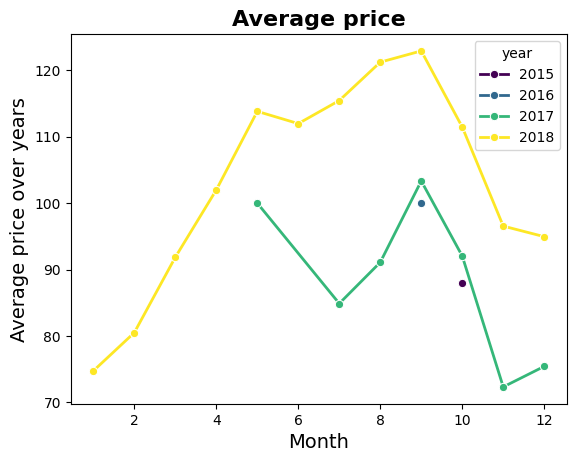

In [ ]:
freeOfferPerMonth = df.groupby(["year", "month",])[ "average price"].mean().reset_index(name = "average price")
sns.lineplot(data=freeOfferPerMonth, x='month', y="average price", hue='year', marker='o', linewidth=2, palette= "viridis")
plt.title('Average price', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average price over years', fontsize=14)


<font color="yellow" size = 5> For marketing purposes they start with low prices in 217 compared with 2018

<ipython-input-46-533925f63be5>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
<ipython-input-46-533925f63be5>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])


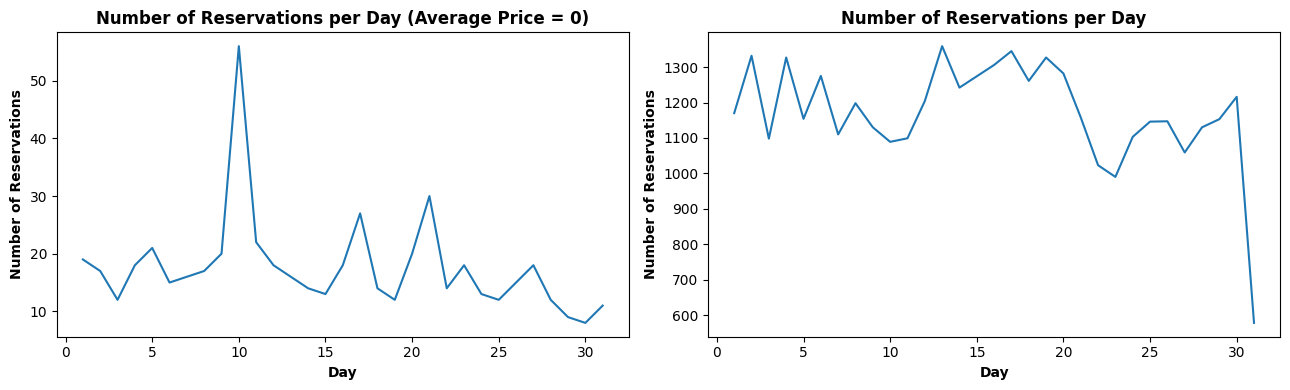

In [ ]:
# @title  later
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First plot: Number of Reservations per Day (Average Price = 0)
x_day_free = df[df["average price"] == 0]["day"].value_counts().index
y_day_free = df[df["average price"] == 0]["day"].value_counts().values
sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
axes[0].set_title('Number of Reservations per Day (Average Price = 0)', fontsize=12, weight='bold')
axes[0].set_xlabel('Day', fontsize=10, weight='bold')
axes[0].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Second plot: Number of Reservations per Day
x_day = df["day"].value_counts().index
y_day = df["day"].value_counts().values
sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])
axes[1].set_title('Number of Reservations per Day', fontsize=12, weight='bold')
axes[1].set_xlabel('Day', fontsize=10, weight='bold')
axes[1].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


<ipython-input-47-720557786f0b>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
<ipython-input-47-720557786f0b>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])


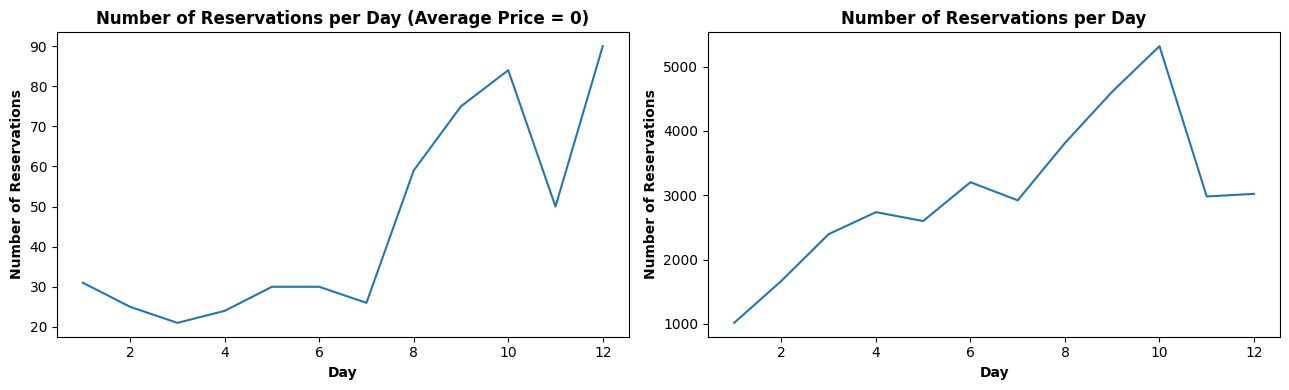

In [ ]:
# @title later
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

# First plot: Number of Reservations per Day (Average Price = 0)
x_day_free = df[df["average price"] == 0]["month"].value_counts().index
y_day_free = df[df["average price"] == 0]["month"].value_counts().values
sns.lineplot(x=x_day_free, y=y_day_free, palette="muted", ax=axes[0])
axes[0].set_title('Number of Reservations per Day (Average Price = 0)', fontsize=12, weight='bold')
axes[0].set_xlabel('Day', fontsize=10, weight='bold')
axes[0].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Second plot: Number of Reservations per Day
x_day = df["month"].value_counts().index
y_day = df["month"].value_counts().values
sns.lineplot(x=x_day, y=y_day, palette="muted", ax=axes[1])
axes[1].set_title('Number of Reservations per Day', fontsize=12, weight='bold')
axes[1].set_xlabel('Day', fontsize=10, weight='bold')
axes[1].set_ylabel('Number of Reservations', fontsize=10, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


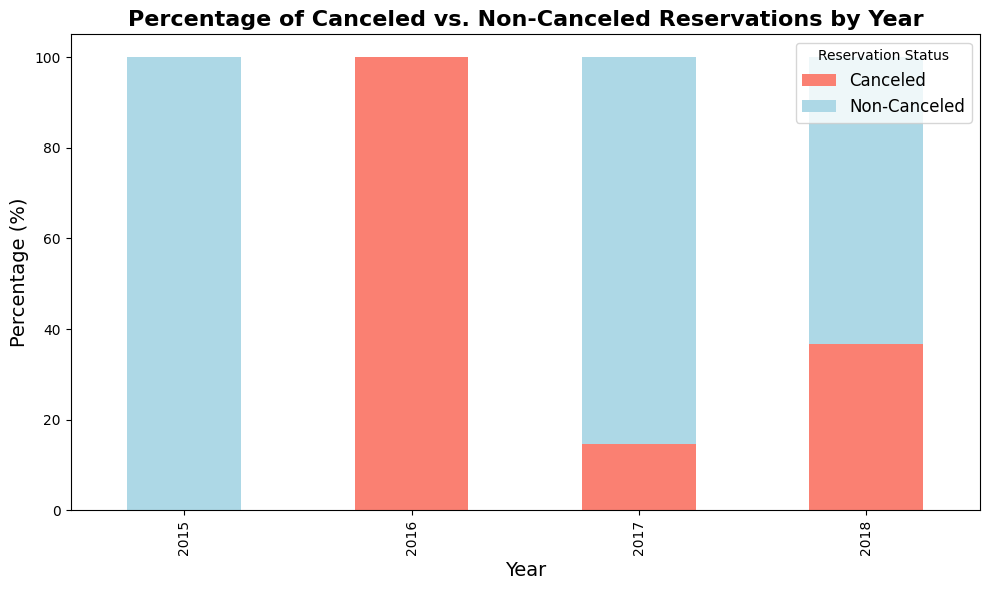

In [ ]:
# Group by year and reservation status (canceled or not) and count the occurrences
cancel_counts = df.groupby(['year', 'booking status']).size().unstack(fill_value=0)

# Normalize to percentages (divide by the total reservations for each year)
cancel_percent = cancel_counts.div(cancel_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked barplot
cancel_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=[ 'salmon', 'lightblue'])

# Customize the plot
plt.title('Percentage of Canceled vs. Non-Canceled Reservations by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Reservation Status', labels=[ 'Canceled', 'Non-Canceled'], fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<font color="yellow" size = 5> Percent of cancelation from total is higher than 2017

<Axes: xlabel='market segment type', ylabel='average price'>

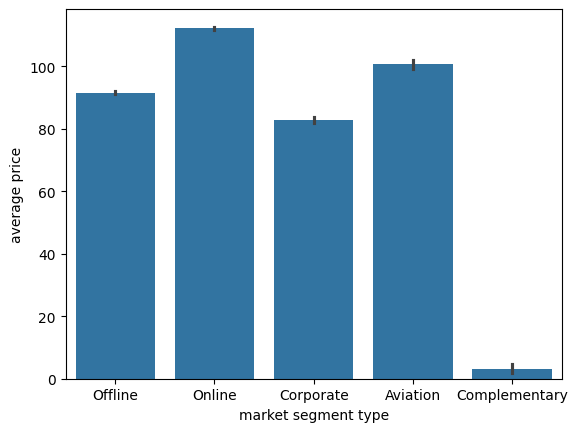

In [ ]:
sns.barplot(data = df, x = "market segment type", y = "average price")

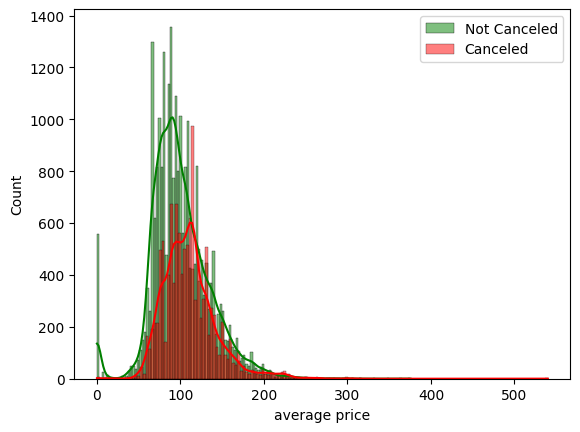

In [ ]:
canceled = df[df["booking status"] == "Canceled"]
non_canceled = df[df["booking status"] == "Not_Canceled"]
sns.histplot(non_canceled["average price"], label = "Not Canceled", color = "green", kde=True)
sns.histplot(canceled["average price"], label = "Canceled", color = "red", kde=True)
plt.legend()

<font color = "yellow" size =5> 1.More Avg price means high probability to cancel






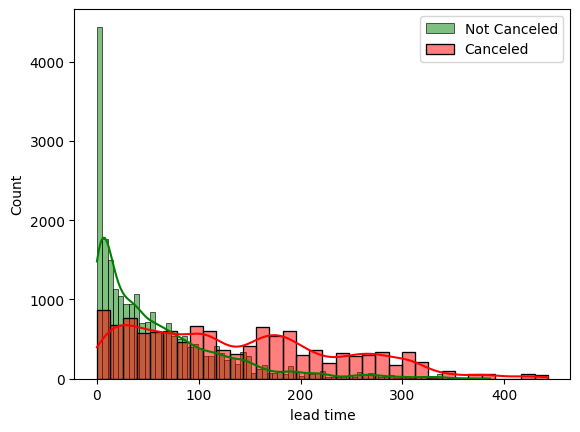

In [ ]:
sns.histplot(non_canceled['lead time'], label = "Not Canceled", color = "green", kde=True)
sns.histplot(canceled['lead time'], label = "Canceled", color = "red", kde=True)
plt.legend()

<font color = "yellow" size =5> 1.More Lead Time means high probability to cancel






In [ ]:
pd.crosstab(canceled['repeated'], canceled['market segment type'], normalize = "columns")

market segment type,Aviation,Corporate,Offline,Online
repeated,,,,
0,1.0,0.986364,0.998098,0.999174
1,0.0,0.013636,0.001902,0.000826


In [ ]:
pd.crosstab(non_canceled['repeated'], non_canceled['market segment type'], normalize = "columns")

market segment type,Aviation,Complementary,Corporate,Offline,Online
repeated,,,,,
0,0.818182,0.677749,0.666667,0.988613,0.993963
1,0.181818,0.322251,0.333333,0.011387,0.006037


In [ ]:
#df.drop(columns = ["P-not-C", "P-C", "number of week nights", "number of weekend nights", "number of adults", "number of children"], inplace = True)

# <font color = "cyan" size=7>**Preprocessing the Data**

<font color="fuchsia" size =6> Detect Ourliers

<ipython-input-55-c2ff716c50fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=feature, ax=axes[i], palette="Set2")
<ipython-input-55-c2ff716c50fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=feature, ax=axes[i], palette="Set2")
<ipython-input-55-c2ff716c50fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=feature, ax=axes[i], palette="Set2")
<ipython-input-55-c2ff716c50fb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

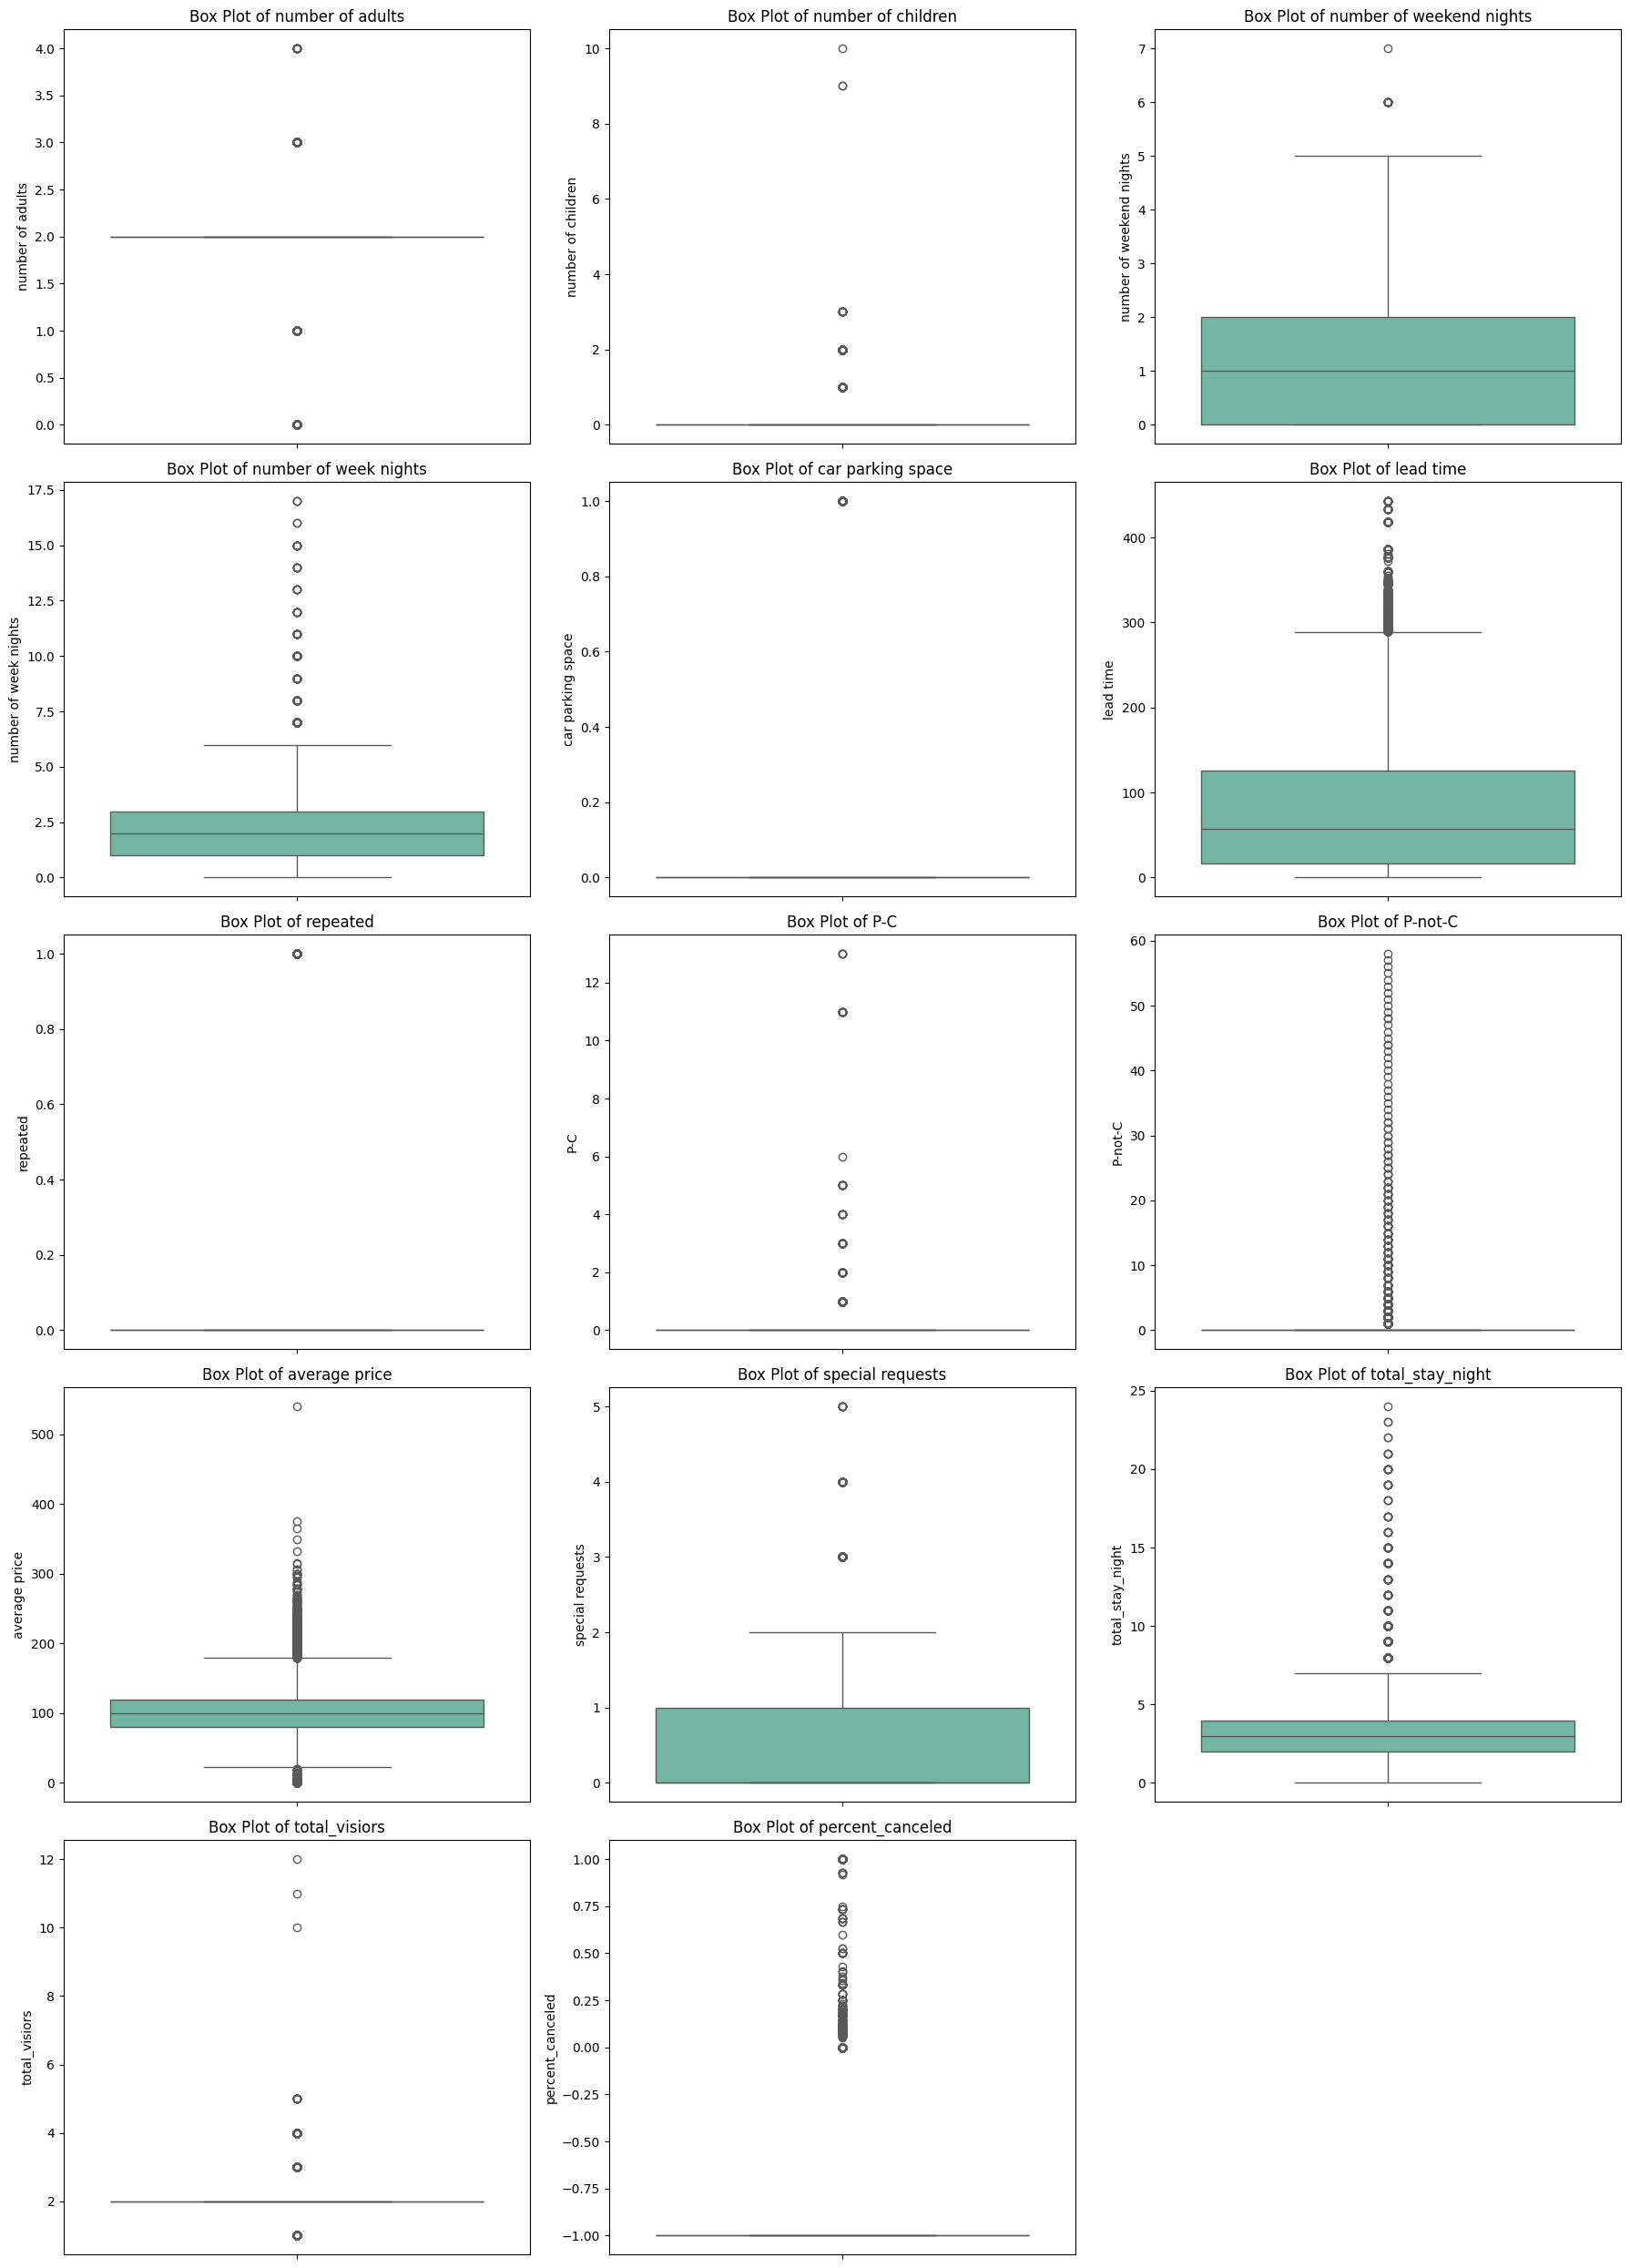

In [ ]:
# Filter numeric features from the DataFrame
numeric_features = df.select_dtypes(include=["float64", "int64"]).columns

# Set up a figure with subplots for all numeric features
num_features = len(numeric_features)
rows = (num_features + 2) // 3  # Number of rows (3 plots per row)
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Create a box plot for each numeric feature
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, y=feature, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Box Plot of {feature}", fontsize=12)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].set_xlabel("")

# Hide any unused subplots
for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


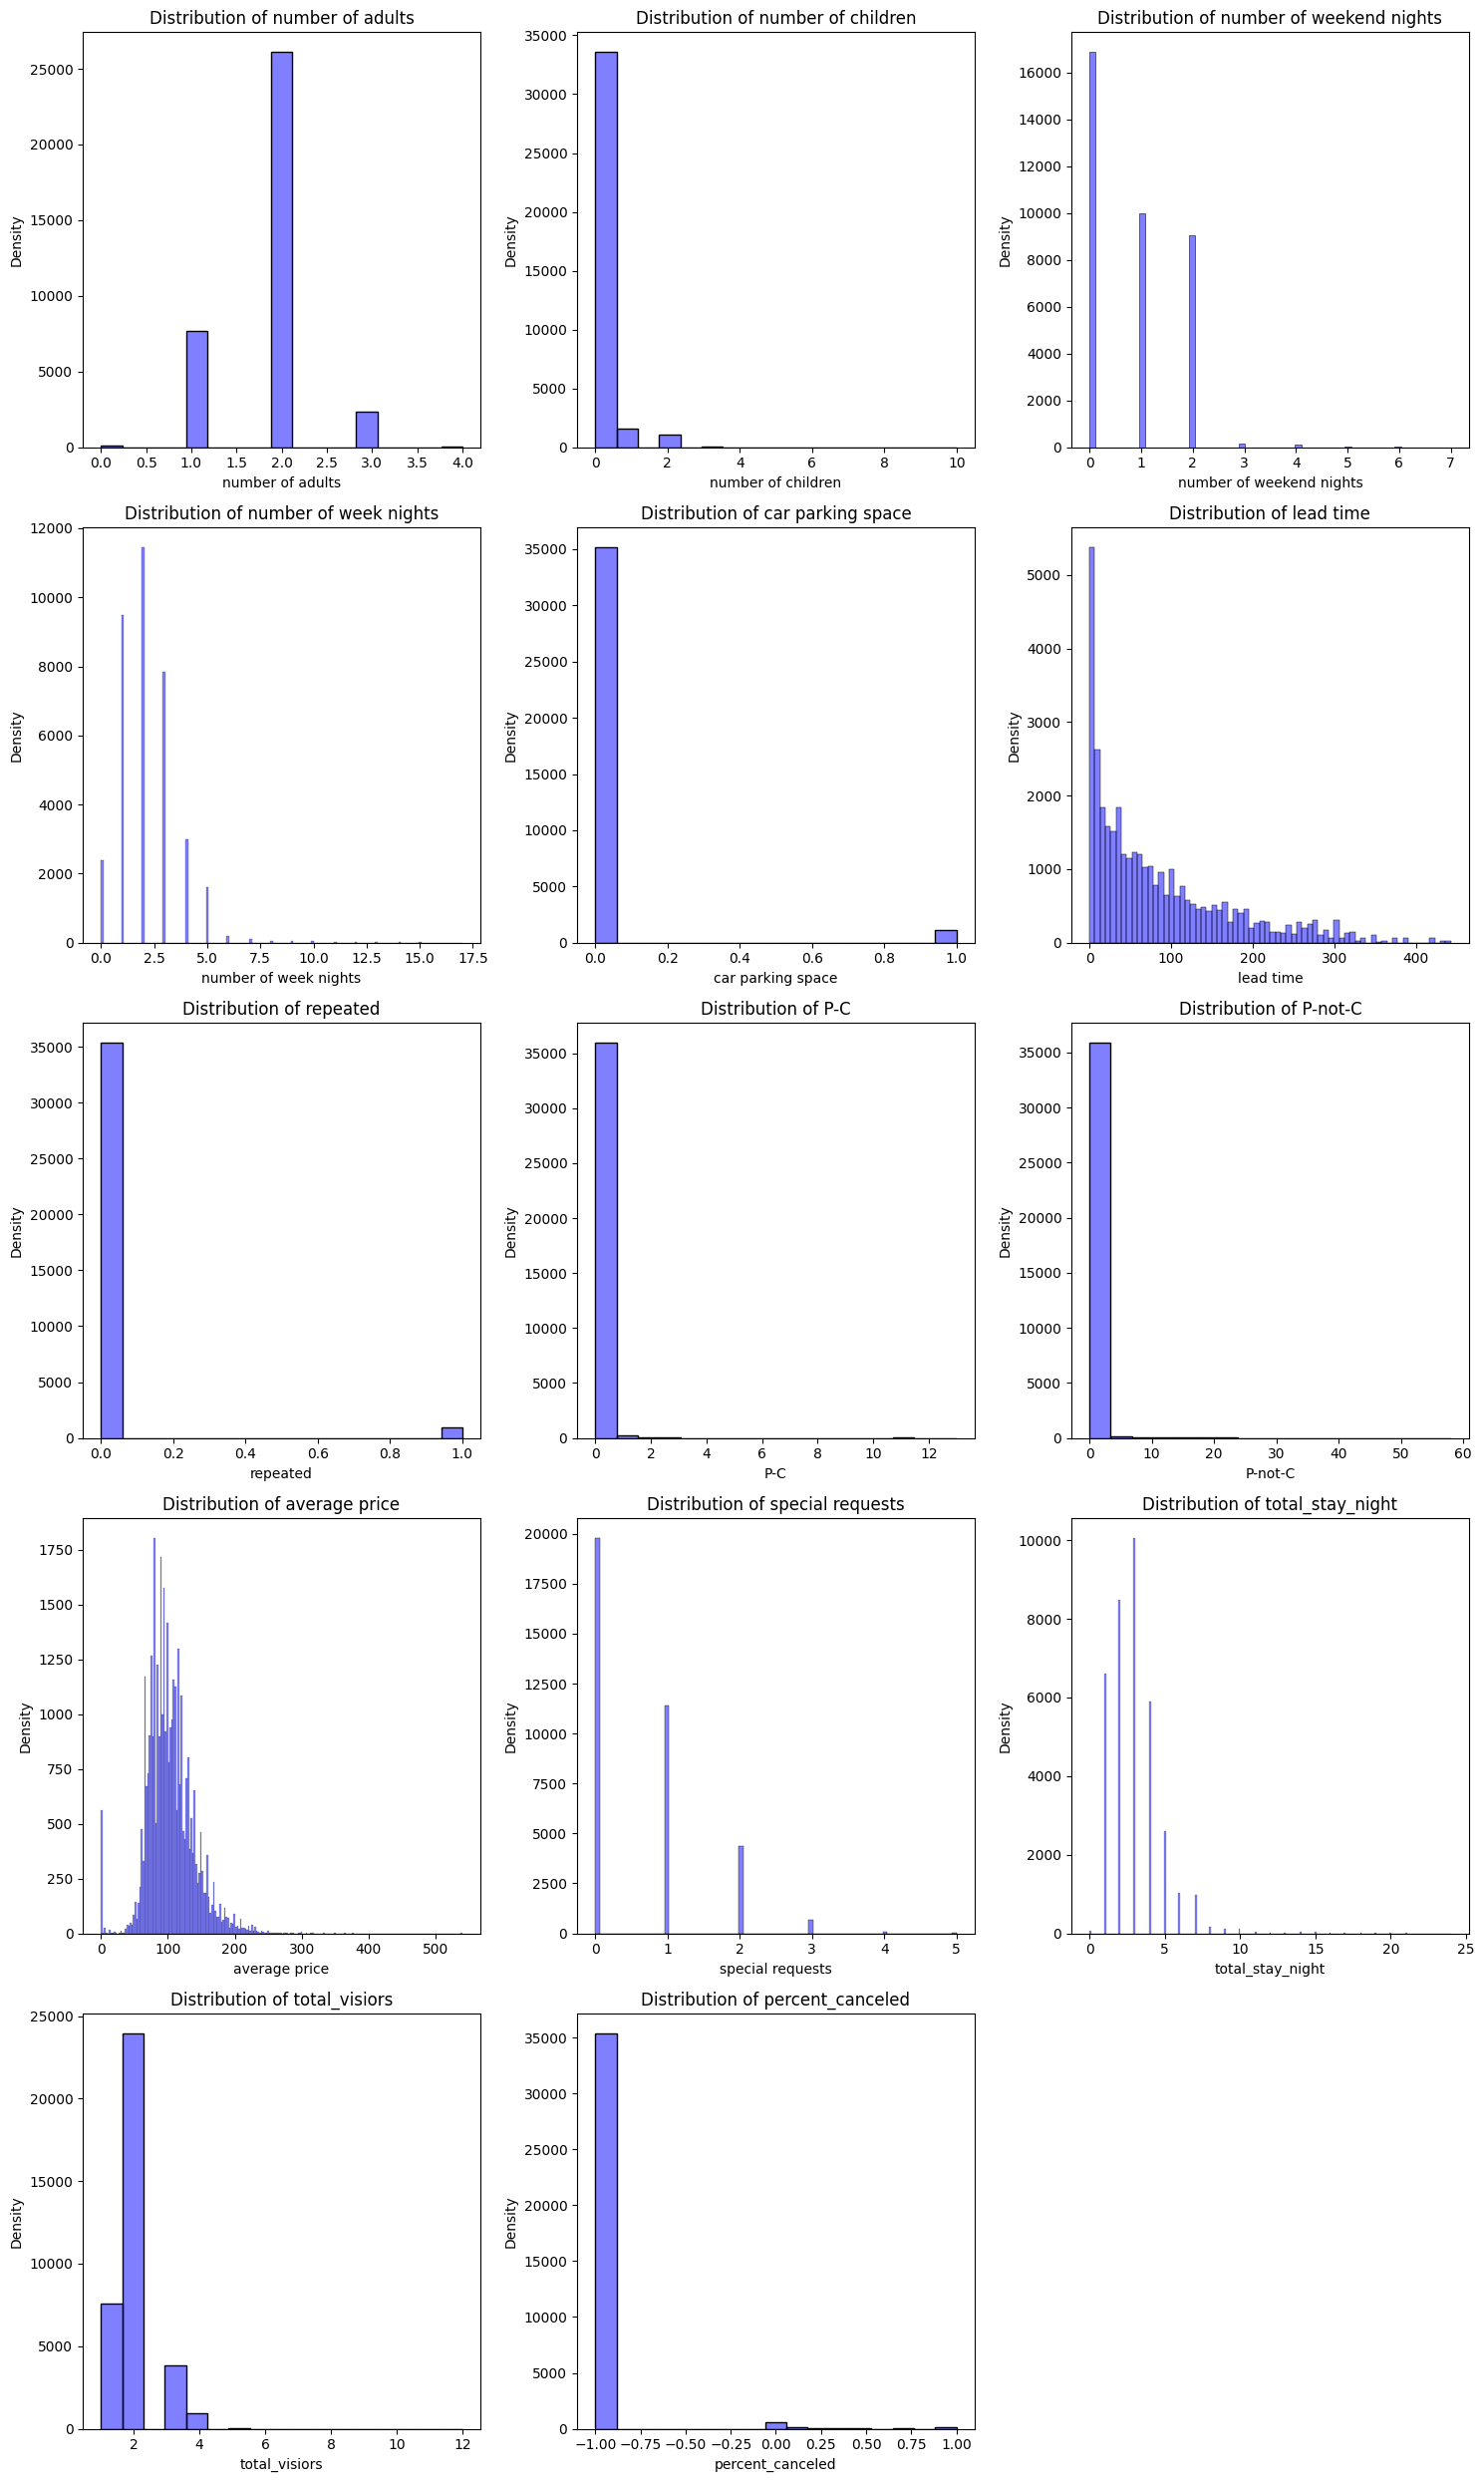

In [ ]:
# Filter numeric columns
numeric_features = df.select_dtypes(include=["float64", "int64"])

# Create subplots for each feature
num_features = len(numeric_features.columns)
rows = (num_features + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(numeric_features.columns):
    sns.histplot(data=df, x=feature, ax=axes[i], color="blue", alpha=0.5)
    axes[i].set_title(f"Distribution of {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# Hide unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
def get_outliers( column_val):
    # Calculate Q1, Q3, and IQR
    Q1 = column_val.quantile(0.25)
    Q3 = column_val.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = [ col_val for col_val in column_val if (col_val < lower_bound) | (col_val > upper_bound)]
    number_of_outliers = len(outliers)

    # Return results
    return number_of_outliers, outliers

# Call the function
result_f1 = get_outliers(df['lead time'])
result_f2 = get_outliers(df['average price'])

print(f"Number of Outliers of lead time = {result_f1[0]}")
print(f"Number of Outliers of average price = {result_f2[0]}")



Number of Outliers of lead time = 1332
Number of Outliers of average price = 1696


In [ ]:
df['lead time'] = df['lead time'].apply(lambda x: np.log1p(x))
df['average price'] = df['average price'].apply(lambda x: np.log1p(x))


In [ ]:
result_f1 = get_outliers(df['lead time'])
result_f2 = get_outliers(df['average price'])
print(f"After, Number of Outliers of lead time = {result_f1[0]}")
print(f"After, Number of Outliers of average price = {result_f2[0]}")


After, Number of Outliers of lead time = 0
After, Number of Outliers of average price = 1014


<font color="fuchsia" size =6> Encoding Features

In [ ]:
cat_cols = df.select_dtypes(exclude=["float64", "int64"]).columns[:-3]

In [ ]:
# Mapping dictionaries
meal_dict = {"Not Selected": 1, 'Meal Plan 1': 2, 'Meal Plan 2': 3, 'Meal Plan 3': 4}
room_dict = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
booking_status_dict = {'Not_Canceled': 0, 'Canceled': 1}
seg_dict = {"Online": 5, 'Offline': 4, 'Corporate': 3, 'Complementary': 1, "Aviation":2}


# Apply replacements for meal, room type, and booking status
df['type of meal'] = df['type of meal'].map(meal_dict)
df['room type'] = df['room type'].map(room_dict)
df['booking status'] = df['booking status'].map(booking_status_dict)
df['market segment type'] = df['market segment type'].map(seg_dict)



<font color="fuchsia" size =6> Features Scaling

In [ ]:
x = df.drop("booking status", axis = 1)
y = df["booking status"]


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [ ]:
X_train.drop(columns = ["number of adults",
"number of children",
"number of weekend nights",
"number of week nights",
"repeated"], inplace = True)
X_test.drop(columns = ["number of adults",
"number of children",
"number of weekend nights",
"number of week nights",
"repeated"], inplace = True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_array = scaler.fit_transform(X_train)

# Convert back to DataFrame for better readability
X_train = pd.DataFrame(scaled_array, columns=X_train.columns)


In [ ]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


<Axes: >

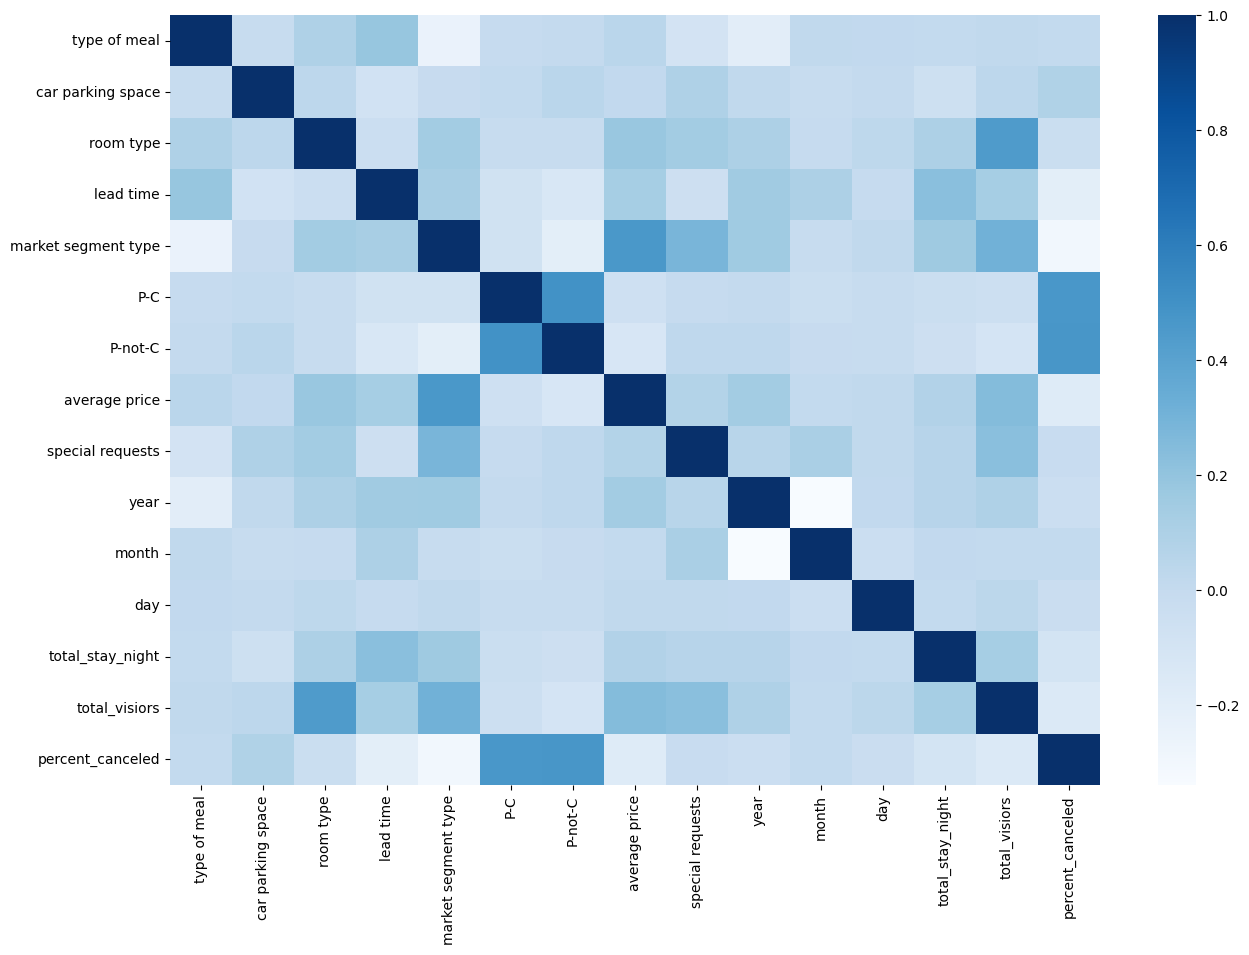

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_train.corr(), cmap = "Blues")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

for index, val in enumerate(vif_data['VIF']):
  if val >10:
    print(vif_data.loc[index,:]['Feature'])
print(vif_data)



                Feature       VIF
0          type of meal  1.254745
1     car parking space  1.026730
2             room type  1.311809
3             lead time  1.276527
4   market segment type  1.730555
5                   P-C  1.484855
6               P-not-C  1.506332
7         average price  1.374243
8      special requests  1.183636
9                  year  1.314943
10                month  1.211933
11                  day  1.004259
12     total_stay_night  1.089138
13        total_visiors  1.415311
14     percent_canceled  1.568043


<font color="fuchsia" size =6> Solve Imbalanced Classes by SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Step 3: Apply SMOTE with k=3
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_resampled))



After SMOTE: Counter({1: 17104, 0: 17104})


In [ ]:
X_train = X_resampled
y_train = y_resampled

# <font color = "cyan" size=7>**Model**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
# Import libraries
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from xgboost import XGBClassifier  # XGBoost
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier



In [ ]:
# 1. ---------- Random Forest Classifier-----------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 2. -------- XGBoost Classifier------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


# 3 ----------Support Vector Machine Classifier (SVM)--------
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


# --------Logistic Regression ----------
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)


# --------- K-Nearest Neighbors (KNN) ---------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# ----------- AdaBoost --------
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)


# ---------- CatBoost Classifier---------
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=6, cat_features=[], random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# ------ Random Forest ---------
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest F1-Score: {rf_f1:.4f}")

# ------ XGBoost ---------
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost F1-Score: {xgb_f1:.4f}")


# ------- SVM -----------
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1-Score: {svm_f1:.4f}")


# -------- Logistic Regression ------
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Logistic Regression F1-Score: {logreg_f1:.4f}")

# --------- AdaBoost ---------
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_f1 = f1_score(y_test, adaboost_predictions)
print(f"AdaBoost Accuracy: {adaboost_accuracy:.4f}")
print(f"AdaBoost F1-Score: {adaboost_f1:.4f}")

# ----------- KNN --------
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN F1-Score: {knn_f1:.4f}")

# ------- CatBoost -------
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
catboost_f1 = f1_score(y_test, catboost_predictions)
print(f"CatBoost Accuracy: {catboost_accuracy:.4f}")
print(f"CatBoost F1-Score: {catboost_f1:.4f}")



Random Forest Accuracy: 0.8965
Random Forest F1-Score: 0.8412
XGBoost Accuracy: 0.8828
XGBoost F1-Score: 0.8216
SVM Accuracy: 0.8255
SVM F1-Score: 0.7562
Logistic Regression Accuracy: 0.7585
Logistic Regression F1-Score: 0.6811
AdaBoost Accuracy: 0.7834
AdaBoost F1-Score: 0.6962
KNN Accuracy: 0.8335
KNN F1-Score: 0.7655
CatBoost Accuracy: 0.8764
CatBoost F1-Score: 0.8113


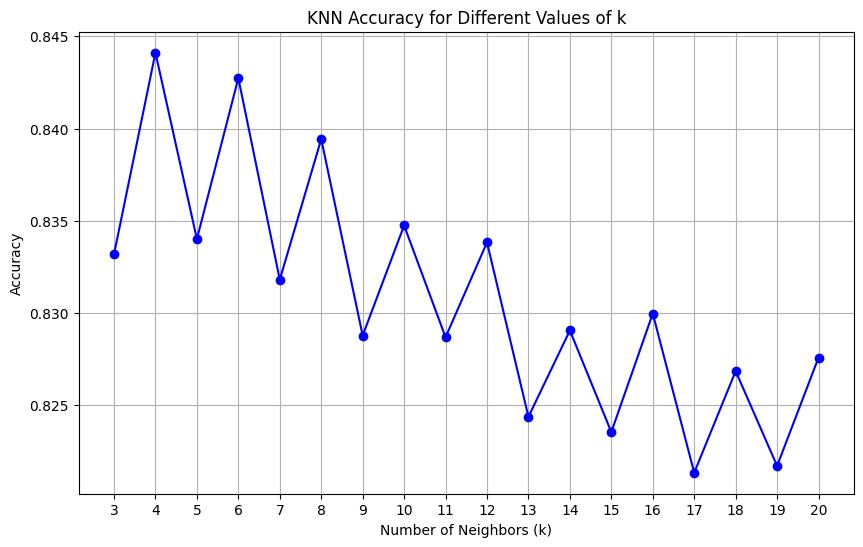

Best k: 4 with accuracy: 0.8441117031049054


In [ ]:
k_values = np.arange(3, 21)
accuracies = []

# Evaluate the KNN model for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracies as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Output the best k and the corresponding accuracy
best_k = k_values[np.argmax(accuracies)]
print(f"Best k: {best_k} with accuracy: {max(accuracies)}")

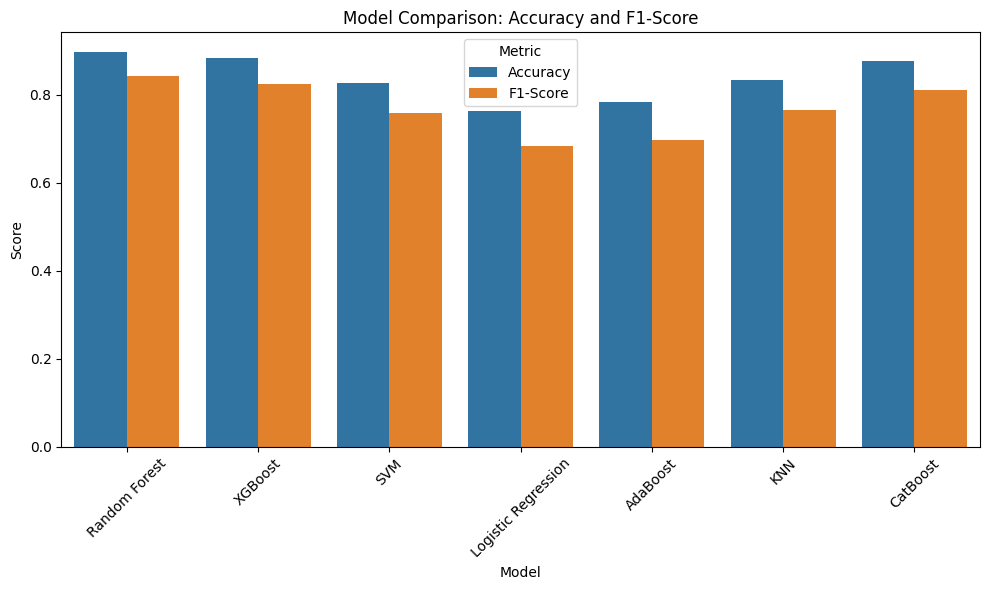

In [ ]:
data = {
    'Model': ['Random Forest', 'Random Forest', 'XGBoost', 'XGBoost', 'SVM', 'SVM',
              'Logistic Regression', 'Logistic Regression', 'AdaBoost', 'AdaBoost',
              'KNN', 'KNN', 'CatBoost', 'CatBoost'],
    'Metric': ['Accuracy', 'F1-Score', 'Accuracy', 'F1-Score', 'Accuracy', 'F1-Score',
               'Accuracy', 'F1-Score', 'Accuracy', 'F1-Score', 'Accuracy', 'F1-Score',
               'Accuracy', 'F1-Score'],
    'Score': [0.8968, 0.8420, 0.8835, 0.8233, 0.8276, 0.7585, 0.7622, 0.6828,
              0.7835, 0.6963, 0.8340, 0.7658, 0.8761, 0.8103]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Create a seaborn barplot for grouped data
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)

# Add labels and title
plt.title('Model Comparison: Accuracy and F1-Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


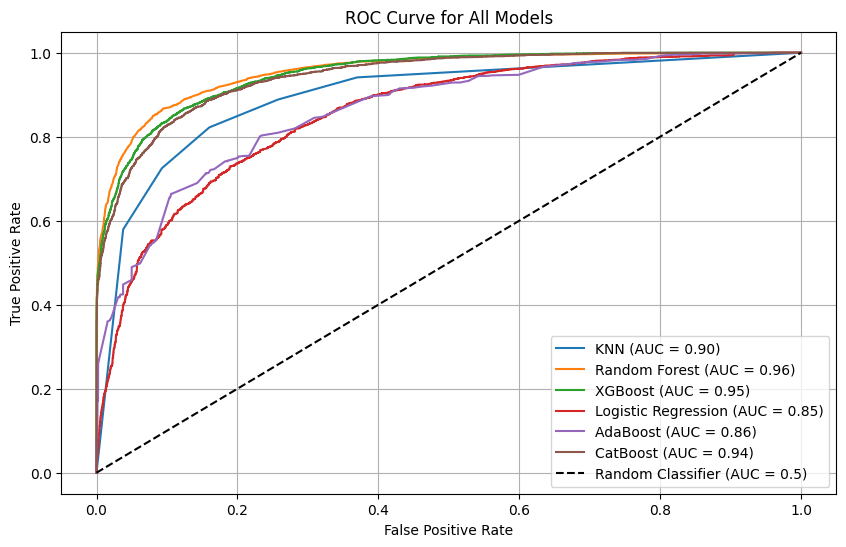

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

models = [
    ('KNN', knn_model),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('Logistic Regression', logreg_model),
    ('AdaBoost', adaboost_model),
    ('CatBoost', catboost_model)
]


plt.figure(figsize=(10, 6))

# Loop through each model and calculate the ROC curve
for model_name, model in models:
    # Get probabilities for ROC
    model_probabilities = model.predict_proba(X_test)[:, 1]  # Binary classification

    fpr, tpr, _ = roc_curve(y_test, model_probabilities)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Set labels and title for the plot
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Get the coefficients (weights for features)
print("Coefficients:", logreg_model.coef_)

# Get the intercept (bias term)
print("Intercept:", logreg_model.intercept_)

Coefficients: [[-0.02825321 -0.22774246 -0.16337016  1.22817974  0.73443572  0.09188366
  -0.27152378  1.26063023 -1.09092265  0.25364859 -0.04894949  0.07817485
   0.08676177  0.00378704 -0.16570853]]
Intercept: [-0.72639317]


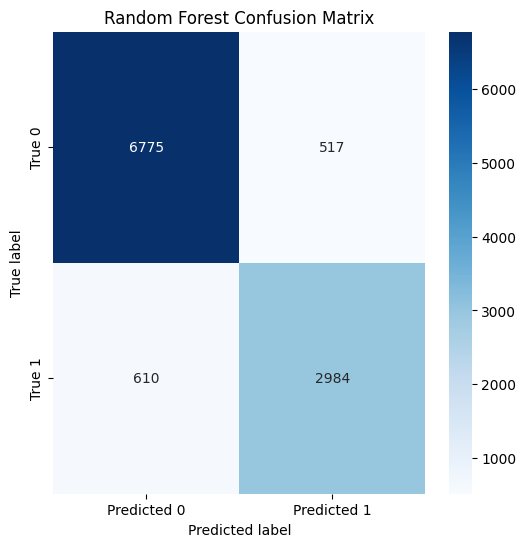

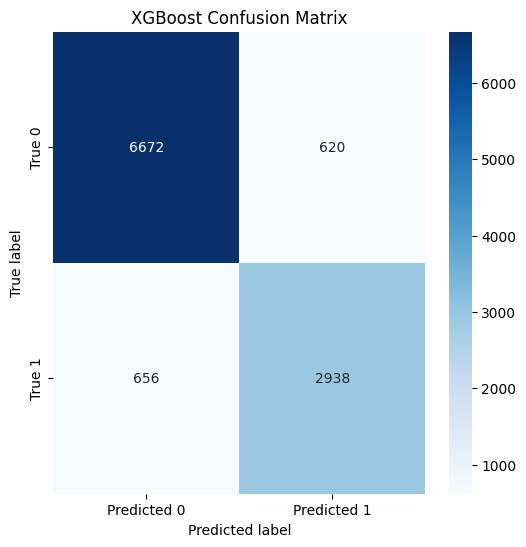

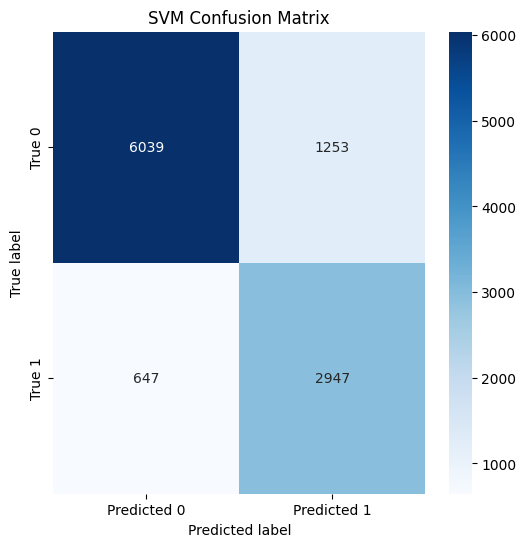

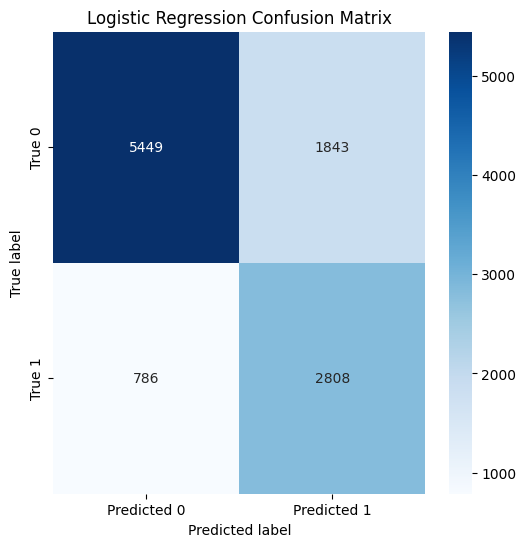

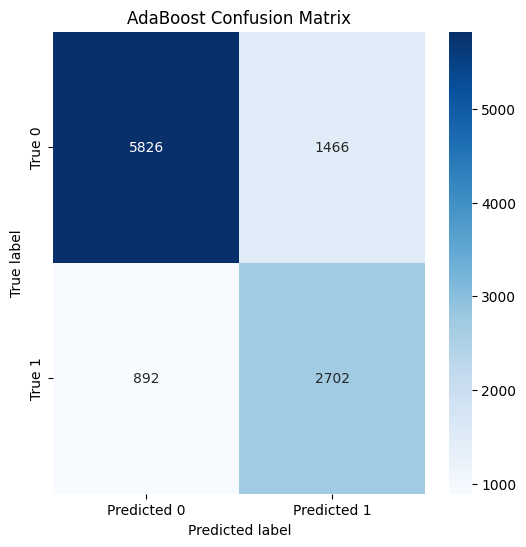

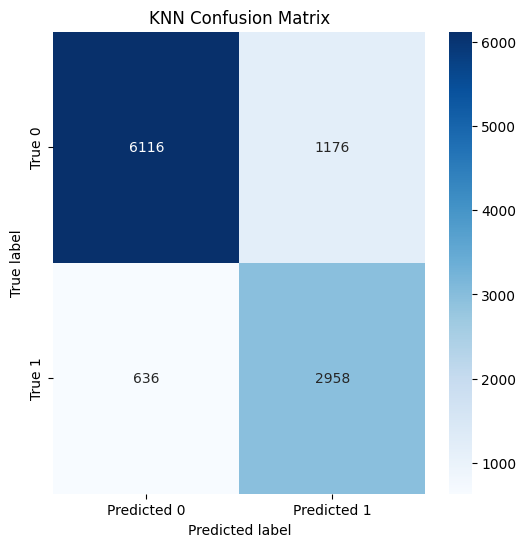

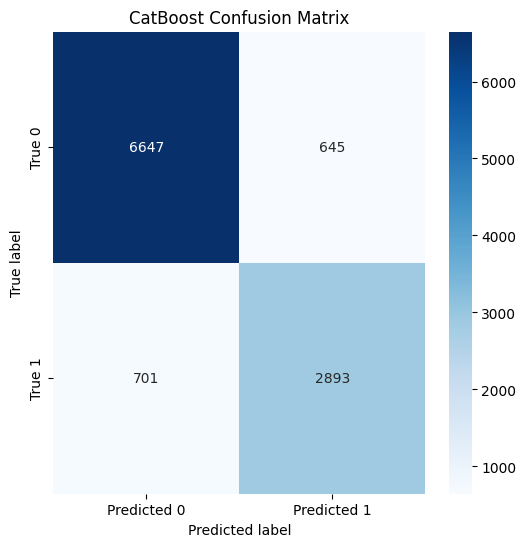

In [ ]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# ------ Random Forest ---------
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")

# ------ XGBoost ---------
plot_confusion_matrix(xgb_model, X_test, y_test, "XGBoost")

# ------- SVM -----------
plot_confusion_matrix(svm_model, X_test, y_test, "SVM")

# -------- Logistic Regression ------
plot_confusion_matrix(logreg_model, X_test, y_test, "Logistic Regression")

# -------- AdaBoost ---------
plot_confusion_matrix(adaboost_model, X_test, y_test, "AdaBoost")

# -------- KNN ---------
plot_confusion_matrix(knn_model, X_test, y_test, "KNN")

# -------- CatBoost ---------
plot_confusion_matrix(catboost_model, X_test, y_test, "CatBoost")


In [ ]:
(rf_model.predict(X_test) != y_test)

,booking status
36238,True
83,False
23449,False
14981,False
18392,True
...,...
15756,False
24616,False
2005,False
12138,False


In [ ]:
X_test[(rf_model.predict(X_test) != y_test.values)]

,type of meal,car parking space,room type,lead time,market segment type,P-C,P-not-C,average price,special requests,year,month,day,total_stay_night,total_visiors,percent_canceled
0,-1.982904,-0.179171,-0.507436,0.700746,0.641345,-0.06085,-0.084083,0.836362,0.486269,0.469532,1.169031,-0.642599,-1.142917,-1.463886,-0.150316
4,0.097986,-0.179171,-0.507436,0.826726,-0.764621,-0.06085,-0.084083,-0.054782,-0.784253,-2.128648,0.515751,0.503927,-1.142917,0.078200,-0.150316
8,-1.982904,-0.179171,-0.507436,0.181322,0.641345,-0.06085,-0.084083,-0.336874,0.486269,0.469532,1.169031,0.274622,0.563832,0.078200,-0.150316
10,0.097986,-0.179171,1.629820,1.404640,0.641345,-0.06085,-0.084083,0.262674,1.756791,0.469532,1.495671,1.306495,1.701664,1.620287,-0.150316
25,-1.982904,-0.179171,-0.507436,0.205626,0.641345,-0.06085,-0.084083,-0.467700,-0.784253,0.469532,-1.444088,-0.069336,0.563832,0.078200,-0.150316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,-1.982904,-0.179171,-0.507436,-0.355186,0.641345,-0.06085,-0.084083,0.211004,0.486269,0.469532,0.842391,0.045317,-0.005085,0.078200,-0.150316
10812,0.097986,-0.179171,1.629820,0.608234,0.641345,-0.06085,-0.084083,0.819127,0.486269,0.469532,-0.790808,0.618580,-1.142917,1.620287,-0.150316
10856,0.097986,-0.179171,1.629820,0.419055,0.641345,-0.06085,-0.084083,0.223093,-0.784253,0.469532,-1.117448,0.045317,0.563832,0.078200,-0.150316
10861,0.097986,-0.179171,-0.507436,0.826726,-0.764621,-0.06085,-0.084083,-0.054782,-0.784253,-2.128648,0.515751,0.503927,-1.142917,0.078200,-0.150316


<font size = 6 color = "yellow">**Gride Search**

<font color = "cyan" size = 5>**Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3, 7, 10],
    "criterion" : ["gini", "entropy", "log_loss"]
}

# Initialize models
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and score for each model
print("Best parameters for Random Forest: ", rf_grid_search.best_params_)
print("Best score for Random Forest: ", rf_grid_search.best_score_)




In [ ]:
best_rf_model = rf_grid_search.best_estimator_
# Predict on the test set
rf_test_predictions = best_rf_model.predict(X_test)

# Evaluate accuracy and F1-score
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Random Forest Test F1-Score: {rf_test_f1:.4f}")


<font color = "cyan" size = 5>**Xgboost**

In [ ]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [3, 6, 10],          # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],# Learning rate
    'subsample': [0.8, 1.0],          # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],   # Subsample ratio of columns for each tree
    'gamma': [0, 0.1, 0.2],           # Minimum loss reduction for a split
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best parameters for XGBoost: ", xgb_grid_search.best_params_)
print("Best F1-score for XGBoost: ", xgb_grid_search.best_score_)



In [ ]:
# Extract the best model
best_xgb_model = xgb_grid_search.best_estimator_

# Predict and evaluate on the test set
xgb_test_predictions = best_xgb_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
xgb_test_f1 = f1_score(y_test, xgb_test_predictions)

print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.4f}")
print(f"XGBoost Test F1-Score: {xgb_test_f1:.4f}")

<font size = 6 color = "yellow">**Cross-validation**

<font size = 6 color = "yellow">**Ensemble Method**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create Voting Classifier (soft voting recommended for probabilistic models)
voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('catboost', catboost_model)], # Initialize SVC with probability=True
    voting='soft'
)

# Fit the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.9245798606366991


In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model_hotel_withsmote.pkl')

['rf_model_hotel_withsmote.pkl']

In [ ]:
import os
file_size = os.path.getsize('rf_model_hotel_withsmote.pkl')
print(f"Model size: {file_size / (1024 * 1024):.2f} MB")

Model size: 129.04 MB


<font size = 6 color = "yellow">**Interpretation**

In [ ]:
rf_importances = rf_model.feature_importances_

# Create a DataFrame for Random Forest feature importances
rf_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
rf_importance_df

,Feature,Importance
7,lead time,0.284044
11,average price,0.137041
12,special requests,0.118150
14,month,0.095202
15,day,0.087103
16,total_stay_night,0.043554
3,number of week nights,0.039569
2,number of weekend nights,0.027497
23,market_segment_Online,0.027135
13,year,0.027123


<font size = 6 color = "yellow"> Save Model

In [ ]:
import joblib
joblib.dump(rf_model, 'rf_model_hotel.pkl')


['rf_model_hotel.pkl']

In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')


In [ ]:
scaler.n_samples_seen_

25399